In [ ]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory to your project folder
project_path = "/content/drive/MyDrive/Employee_Attrition_Classification"
os.chdir(project_path)
print("✅ Current working directory:", os.getcwd())

✅ Current working directory: /content/drive/MyDrive/Employee_Attrition_Classification


In [ ]:
!pip install --quiet shap lime imbalanced-learn xgboost lightgbm catboost optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 26.1 MB/s eta 0:00:00


# 1. SETUP & INSTALL REQUIRED PACKAGES

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, accuracy_score, precision_score, recall_score)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Explainability
import shap

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All packages imported successfully!")

✓ All packages imported successfully!


# 2. UPLOAD & LOAD DATA

In [ ]:
# Load dataset
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("\n✓ Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())



✓ Dataset loaded successfully!
Dataset Shape: (1470, 35)

First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum().sum(), "total missing values")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [ ]:
print("\nTarget Variable Distribution:")
display(df['Attrition'].value_counts())
print(f"Attrition Rate: {df['Attrition'].value_counts(normalize=True)['Yes']*100:.2f}%")


Target Variable Distribution:


,count
Attrition,
No,1233
Yes,237


Attrition Rate: 16.12%


In [ ]:
# Statistical Summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 3. EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)


EXPLORATORY DATA ANALYSIS


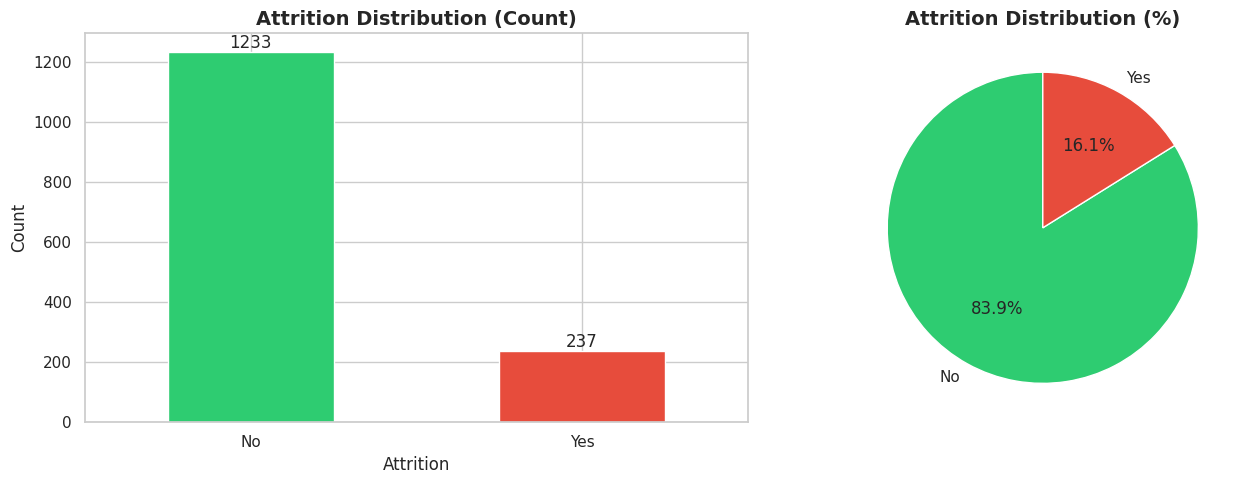

⚠️ Class Imbalance Detected: Only 16.1% attrition


In [ ]:
# 3.1 Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['Attrition'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Attrition Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

for container in axes[0].containers:
    axes[0].bar_label(container)

df['Attrition'].value_counts(normalize=True).plot(kind='pie', ax=axes[1],
                                                    autopct='%1.1f%%',
                                                    colors=['#2ecc71', '#e74c3c'],
                                                    startangle=90)
axes[1].set_title('Attrition Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"⚠️ Class Imbalance Detected: Only {df['Attrition'].value_counts(normalize=True)['Yes']*100:.1f}% attrition")

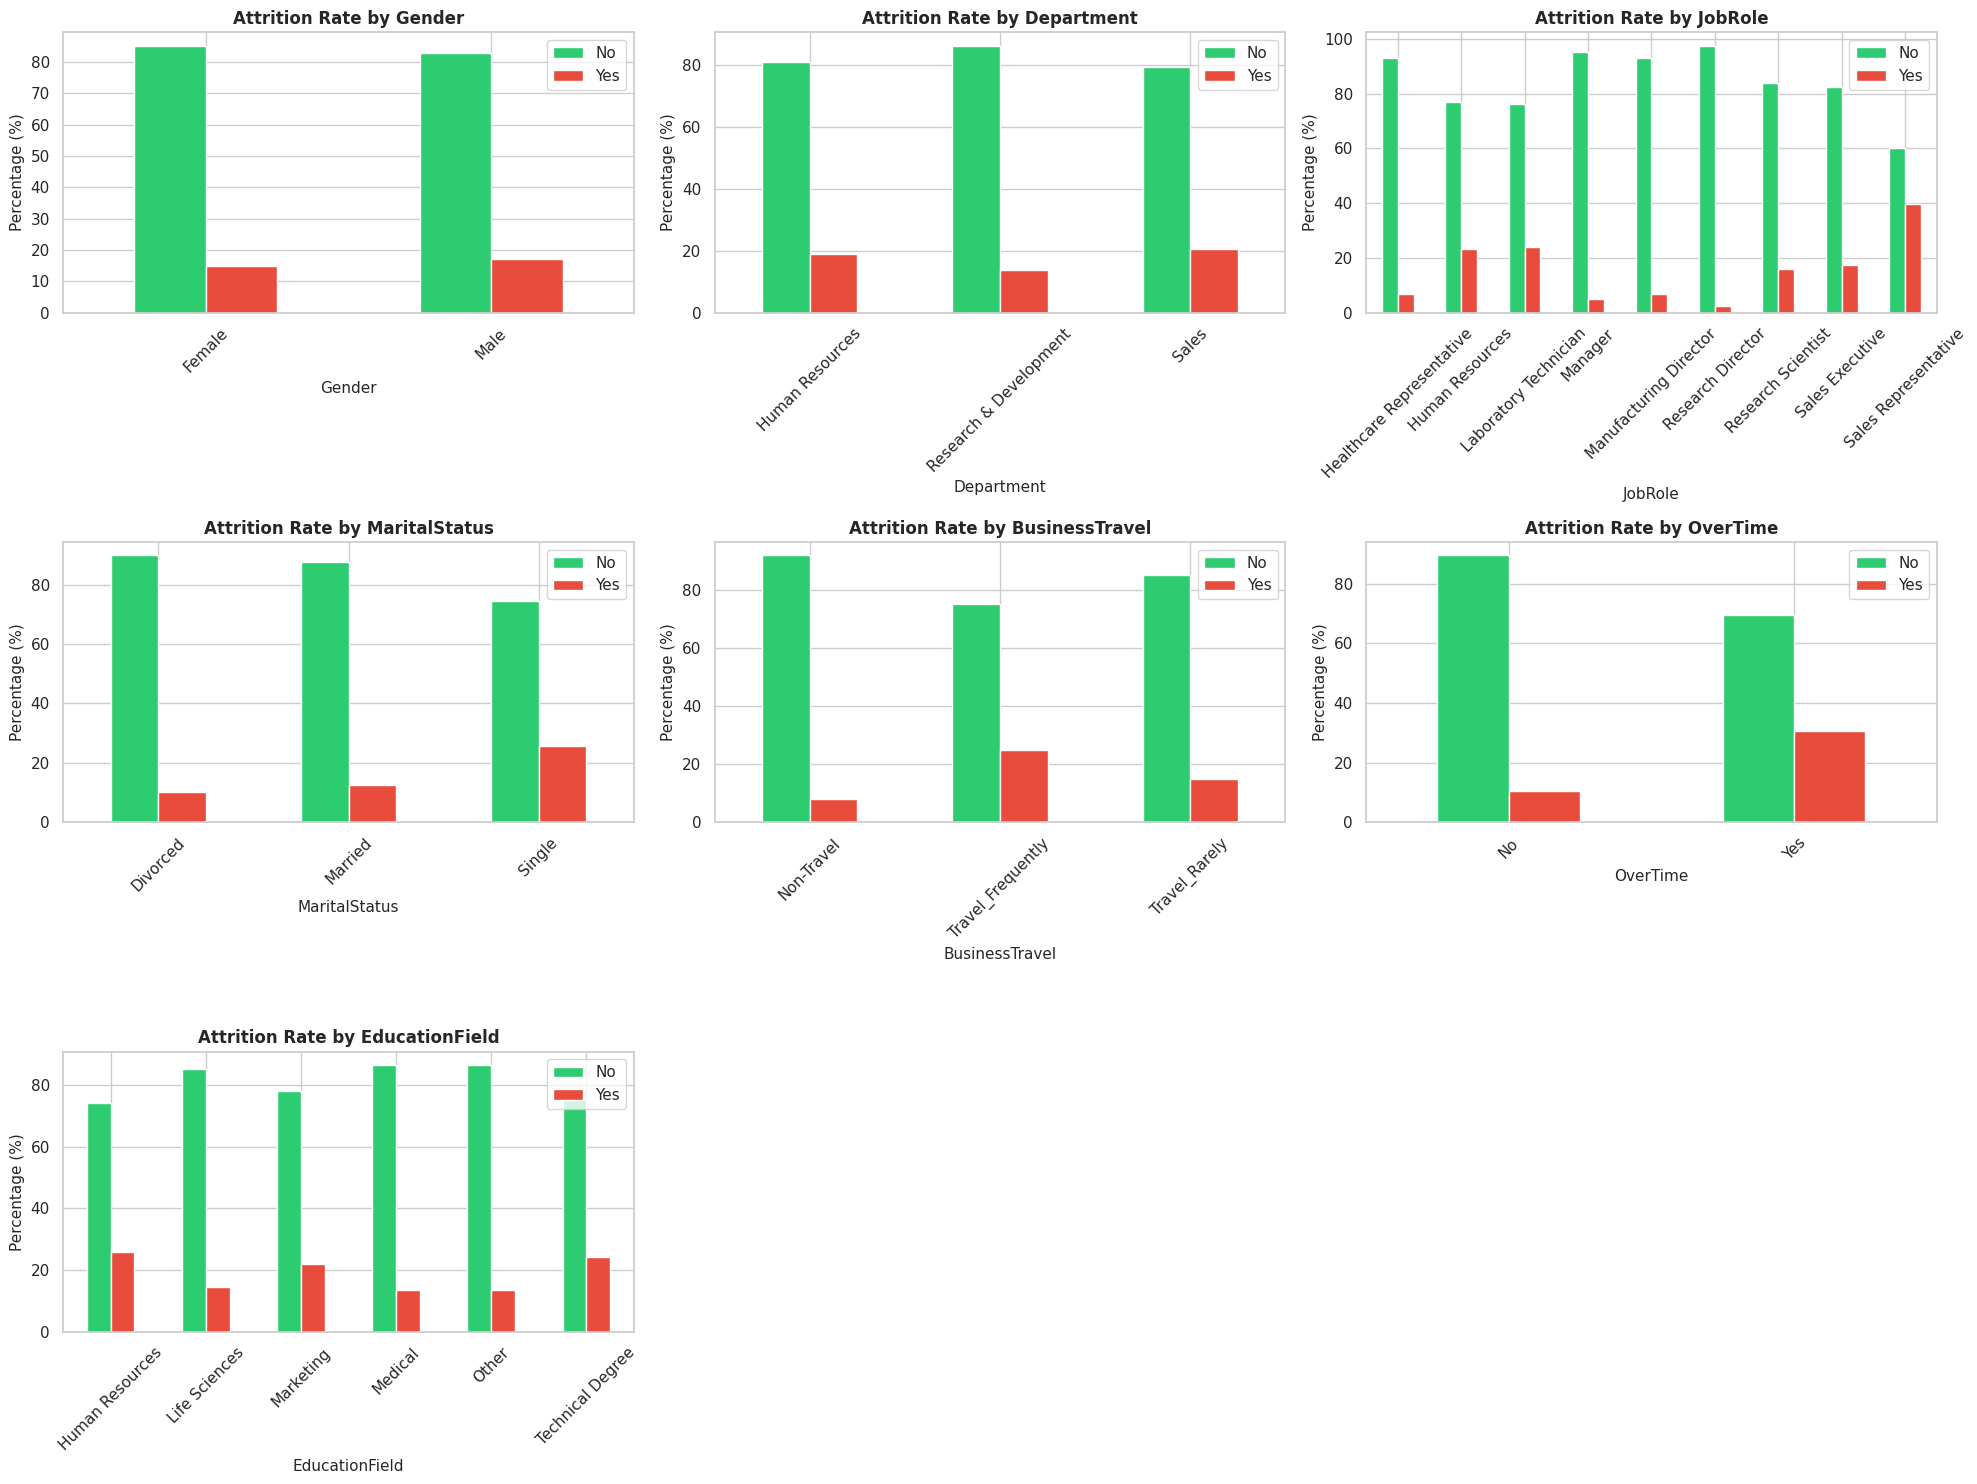

In [ ]:
# 3.2 Univariate Analysis - Attrition by Categorical Features
categorical_cols = ['Gender', 'Department', 'JobRole', 'MaritalStatus',
                    'BusinessTravel', 'OverTime', 'EducationField']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        attrition_by_cat = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
        attrition_by_cat.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'Attrition Rate by {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=11)
        axes[idx].set_ylabel('Percentage (%)', fontsize=11)
        axes[idx].legend(['No', 'Yes'], loc='upper right')
        axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Key Insights from Categorical Analysis
print("\n📊 KEY INSIGHTS - Categorical Features:")
print("\n1. Attrition by Department:")
display(pd.crosstab(df['Department'], df['Attrition'], normalize='index').round(3) * 100)

print("\n2. Attrition by OverTime:")
display(pd.crosstab(df['OverTime'], df['Attrition'], normalize='index').round(3) * 100)

print("\n3. Top 5 Job Roles with Highest Attrition:")
attrition_by_role = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')['Yes'] * 100
display(attrition_by_role.sort_values(ascending=False).head())


📊 KEY INSIGHTS - Categorical Features:

1. Attrition by Department:


Attrition,No,Yes
Department,,
Human Resources,81.0,19.0
Research & Development,86.2,13.8
Sales,79.4,20.6



2. Attrition by OverTime:


Attrition,No,Yes
OverTime,,
No,89.6,10.4
Yes,69.5,30.5



3. Top 5 Job Roles with Highest Attrition:


,Yes
JobRole,
Sales Representative,39.759036
Laboratory Technician,23.938224
Human Resources,23.076923
Sales Executive,17.484663
Research Scientist,16.095890


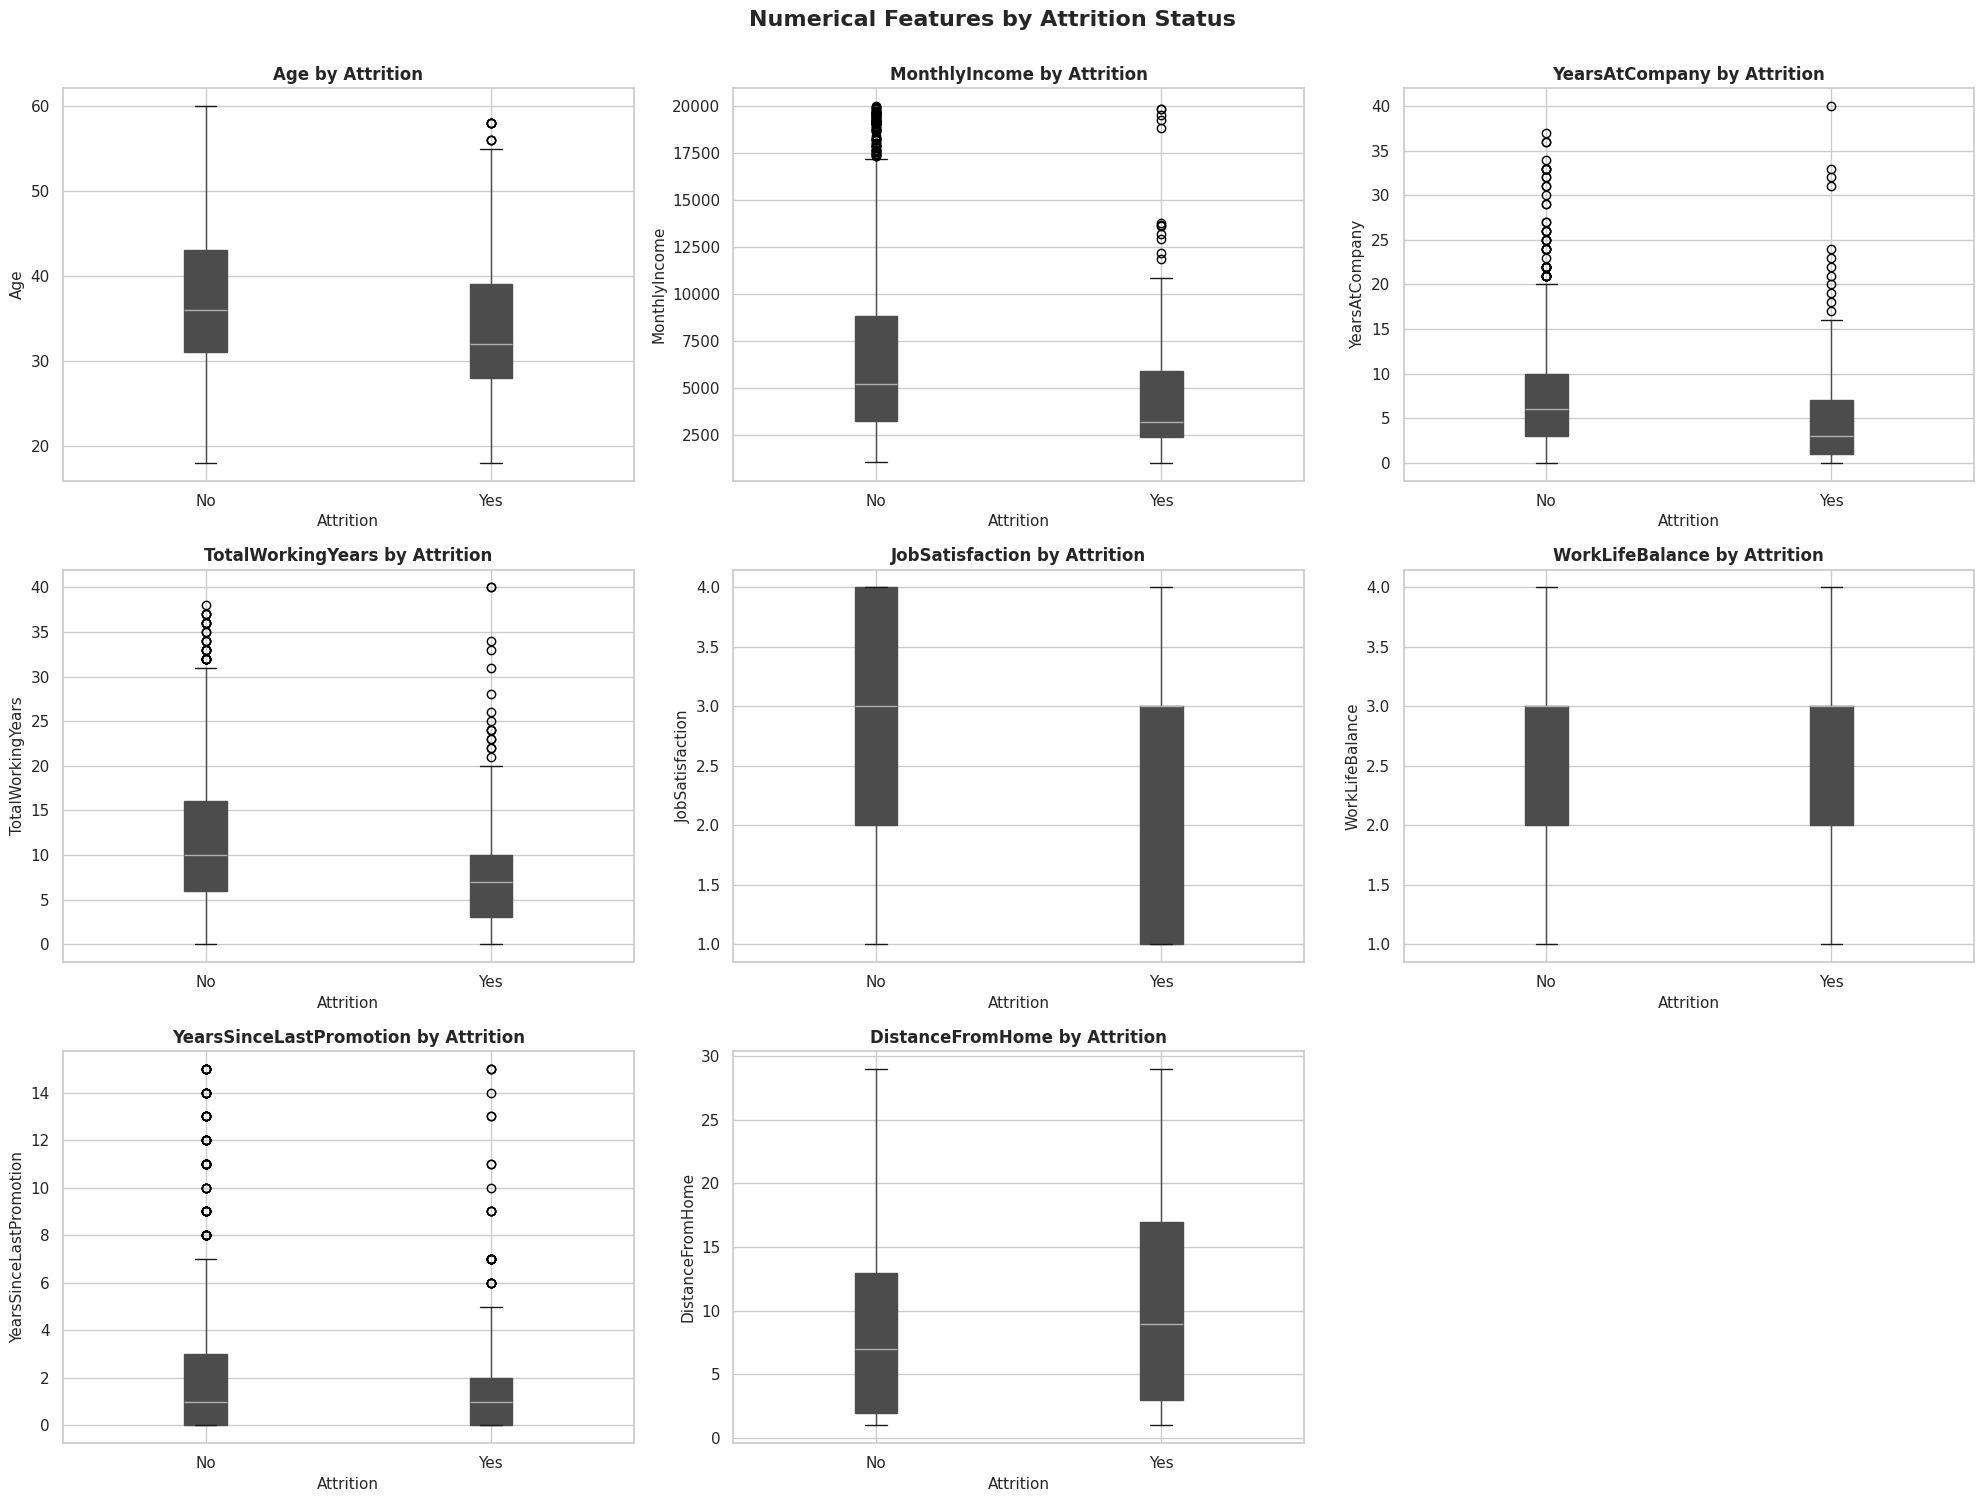

In [ ]:
# 3.3 Numerical Features Distribution by Attrition
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears',
                  'JobSatisfaction', 'WorkLifeBalance', 'YearsSinceLastPromotion',
                  'DistanceFromHome']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df.boxplot(column=col, by='Attrition', ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'{col} by Attrition', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Attrition', fontsize=11)
        axes[idx].set_ylabel(col, fontsize=11)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['No', 'Yes'])

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Numerical Features by Attrition Status', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
# Statistical comparison
print("\n📊 KEY INSIGHTS - Numerical Features:")
print("\nAverage Metrics by Attrition Status:")
comparison_df = df.groupby('Attrition')[['Age', 'MonthlyIncome', 'YearsAtCompany',
                                          'JobSatisfaction', 'WorkLifeBalance',
                                          'DistanceFromHome']].mean()
display(comparison_df.round(2))


📊 KEY INSIGHTS - Numerical Features:

Average Metrics by Attrition Status:


,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,DistanceFromHome
Attrition,,,,,,
No,37.56,6832.74,7.37,2.78,2.78,8.92
Yes,33.61,4787.09,5.13,2.47,2.66,10.63



📊 Correlation Analysis:

Top 10 Features Correlated with Attrition:


,Attrition_Numeric
Attrition_Numeric,1.000000
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373
YearsSinceLastPromotion,-0.033019


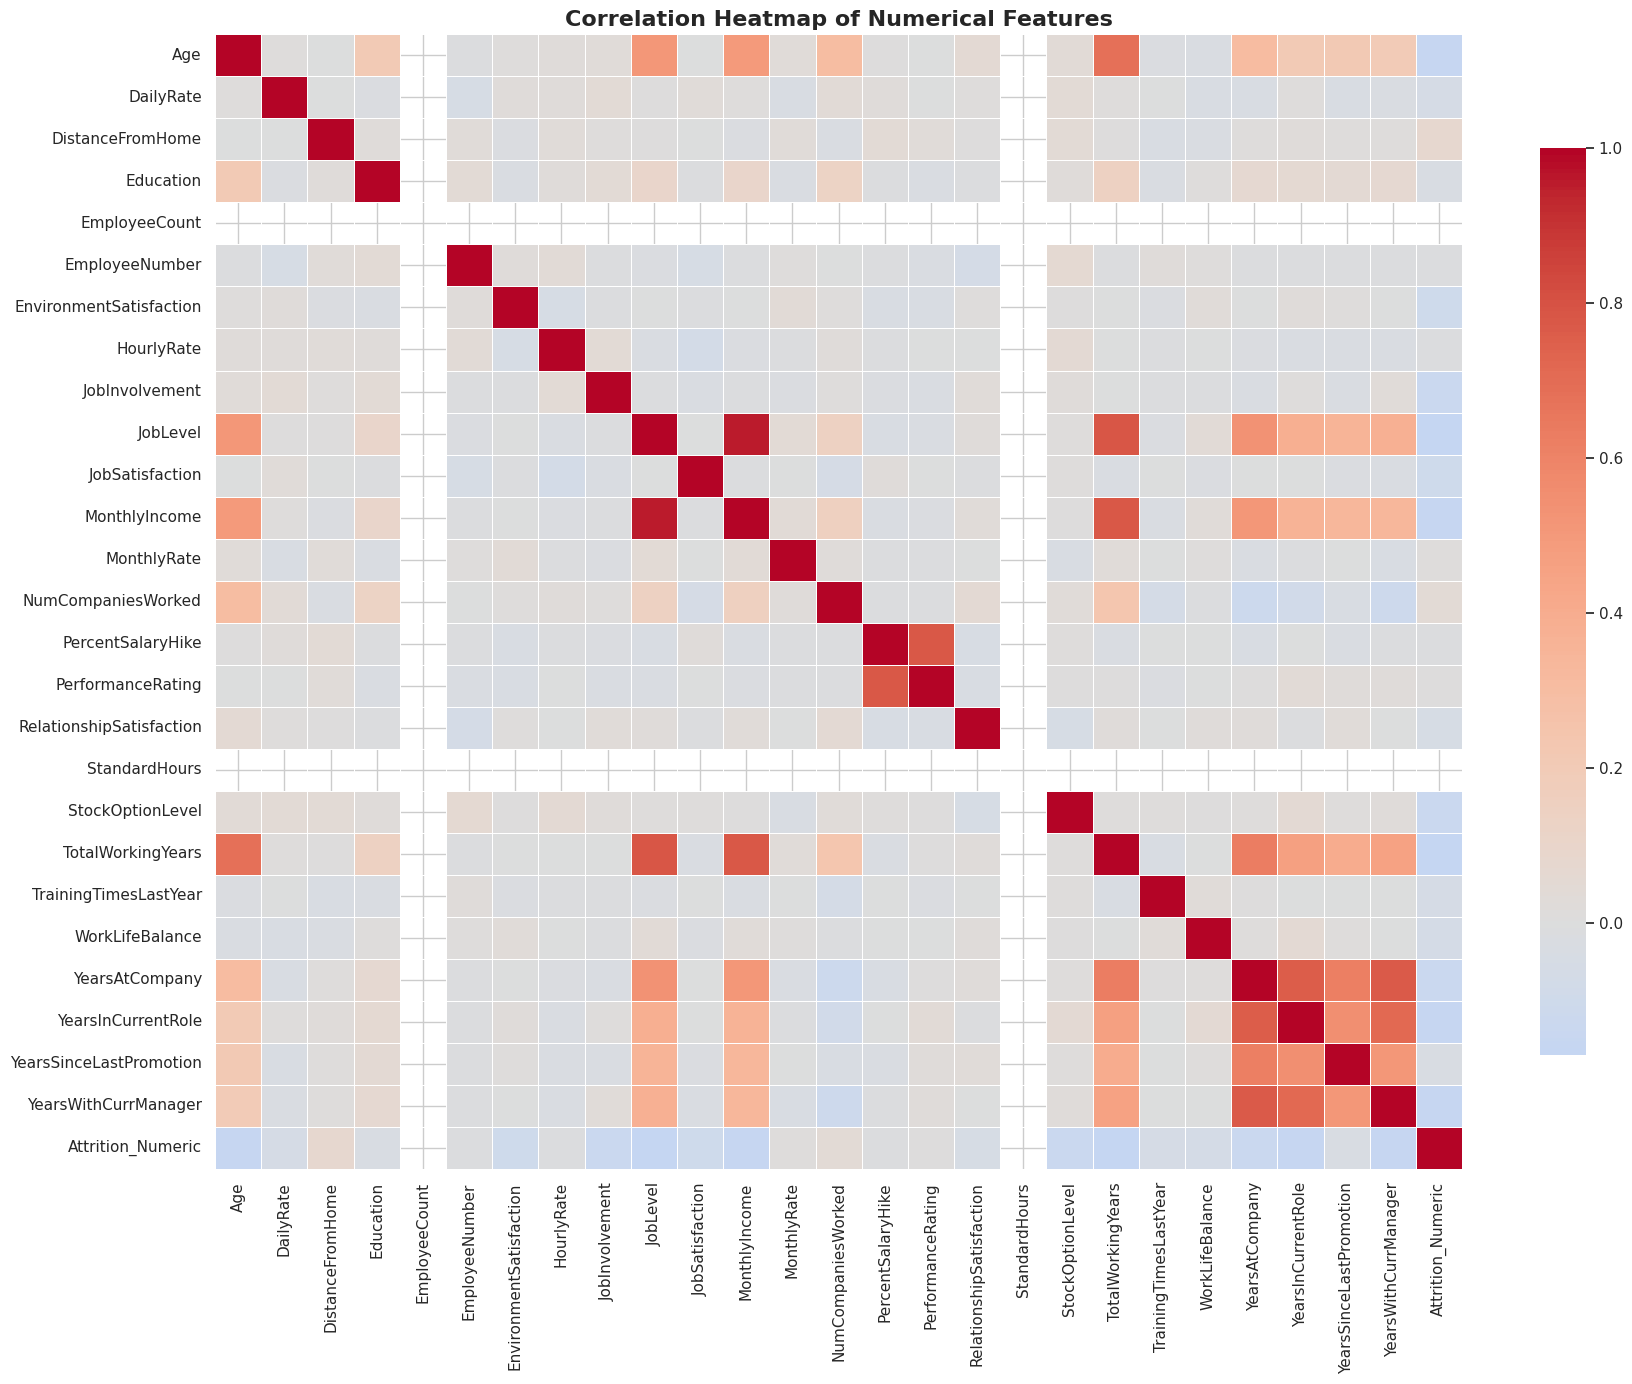

In [ ]:
# 3.4 Correlation Analysis
print("\n📊 Correlation Analysis:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Convert Attrition to numeric for correlation
df_corr = df.copy()
df_corr['Attrition_Numeric'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

correlation_matrix = df_corr[numerical_features + ['Attrition_Numeric']].corr()

# Plot correlation with Attrition
attrition_corr = correlation_matrix['Attrition_Numeric'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Attrition:")
display(attrition_corr.head(11))  # 11 because Attrition_Numeric itself is included

# Full correlation heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


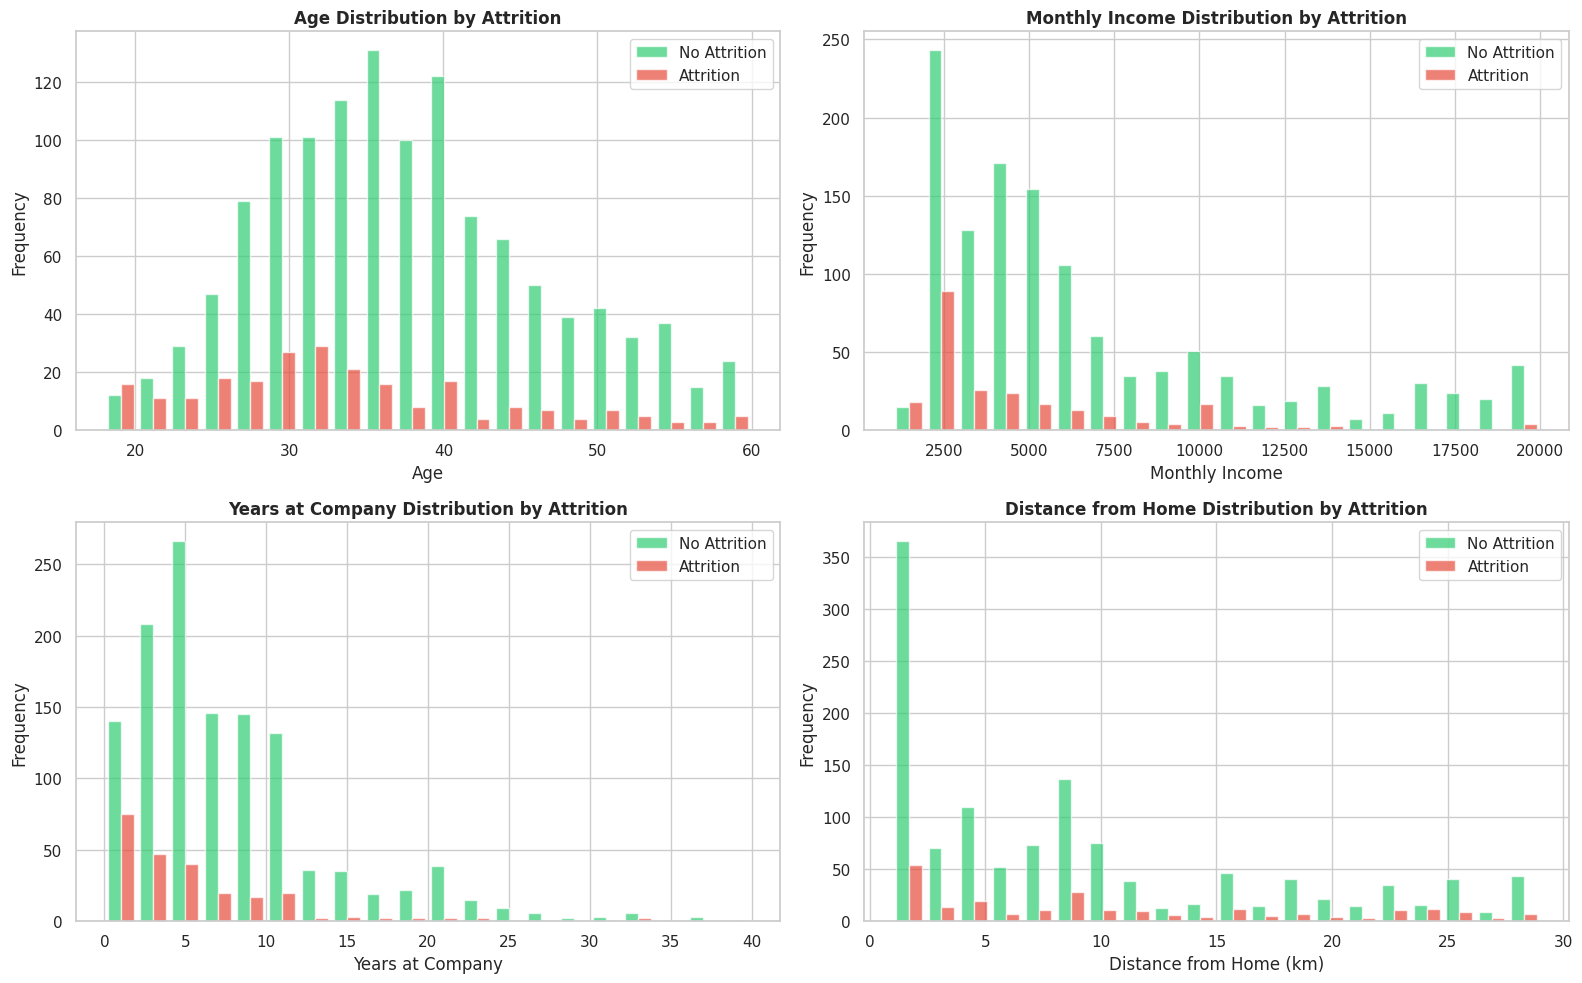

In [ ]:
# 3.5 Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Age Distribution
axes[0, 0].hist([df[df['Attrition']=='No']['Age'], df[df['Attrition']=='Yes']['Age']],
                bins=20, label=['No Attrition', 'Attrition'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_title('Age Distribution by Attrition', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Monthly Income Distribution
axes[0, 1].hist([df[df['Attrition']=='No']['MonthlyIncome'], df[df['Attrition']=='Yes']['MonthlyIncome']],
                bins=20, label=['No Attrition', 'Attrition'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_title('Monthly Income Distribution by Attrition', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Monthly Income')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Years at Company Distribution
axes[1, 0].hist([df[df['Attrition']=='No']['YearsAtCompany'], df[df['Attrition']=='Yes']['YearsAtCompany']],
                bins=20, label=['No Attrition', 'Attrition'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_title('Years at Company Distribution by Attrition', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Years at Company')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Distance from Home Distribution
axes[1, 1].hist([df[df['Attrition']=='No']['DistanceFromHome'], df[df['Attrition']=='Yes']['DistanceFromHome']],
                bins=20, label=['No Attrition', 'Attrition'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_title('Distance from Home Distribution by Attrition', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Distance from Home (km)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


# 4. FEATURE ENGINEERING

In [ ]:
print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

# Create a copy for feature engineering
df_fe = df.copy()

# 4.1 Create Derived Features
print("\n🔧 Creating Derived Features...")

# Tenure Bands
df_fe['TenureBand'] = pd.cut(df_fe['YearsAtCompany'],
                              bins=[0, 2, 5, 10, 40],
                              labels=['Short', 'Medium', 'Long', 'VeryLong'])

# Work-Life Balance Index (combining multiple factors)
df_fe['WorkLifeIndex'] = (
    df_fe['WorkLifeBalance'] * 0.4 +
    (4 - df_fe['OverTime'].map({'Yes': 3, 'No': 0})) * 0.3 +
    (3 - df_fe['BusinessTravel'].map({'Travel_Rarely': 1, 'Travel_Frequently': 2,
                                       'Non-Travel': 0})) * 0.3
)

# Promotion Gap
df_fe['PromotionGap'] = df_fe['YearsSinceLastPromotion']

# Income to Age Ratio
df_fe['IncomePerYear'] = df_fe['MonthlyIncome'] / (df_fe['Age'] + 1)

# Tenure Ratio (Years at Company / Total Working Years)
df_fe['TenureRatio'] = df_fe['YearsAtCompany'] / (df_fe['TotalWorkingYears'] + 1)

# Job Stability (Years with Current Manager / Years at Company)
df_fe['JobStability'] = df_fe['YearsWithCurrManager'] / (df_fe['YearsAtCompany'] + 1)

# Experience Level
df_fe['ExperienceLevel'] = pd.cut(df_fe['TotalWorkingYears'],
                                   bins=[0, 5, 10, 20, 50],
                                   labels=['Junior', 'Mid', 'Senior', 'Expert'])

# Satisfaction Score (average of multiple satisfaction metrics)
df_fe['SatisfactionScore'] = (
    df_fe['JobSatisfaction'] +
    df_fe['EnvironmentSatisfaction'] +
    df_fe['RelationshipSatisfaction']
) / 3

# Compensation vs Performance Ratio
df_fe['CompensationPerformanceRatio'] = df_fe['MonthlyIncome'] / (df_fe['PerformanceRating'] + 1)

new_features = ['TenureBand', 'WorkLifeIndex', 'PromotionGap', 'IncomePerYear',
                'TenureRatio', 'JobStability', 'ExperienceLevel', 'SatisfactionScore',
                'CompensationPerformanceRatio']

print(f"✓ Created {len(new_features)} new features:")
for feat in new_features:
    print(f"  • {feat}")



FEATURE ENGINEERING

🔧 Creating Derived Features...
✓ Created 9 new features:
  • TenureBand
  • WorkLifeIndex
  • PromotionGap
  • IncomePerYear
  • TenureRatio
  • JobStability
  • ExperienceLevel
  • SatisfactionScore
  • CompensationPerformanceRatio


In [71]:
# 4.2 Encode Target Variable
print("\n🔧 Encoding Target Variable...")
df_fe['Attrition'] = df_fe['Attrition'].map({'Yes': 1, 'No': 0})
print("✓ Attrition encoded: Yes=1, No=0")


🔧 Encoding Target Variable...
✓ Attrition encoded: Yes=1, No=0


In [72]:
# 4.3 Remove Constant or Irrelevant Features
print("\n🔧 Removing Irrelevant Features...")
constant_cols = [col for col in df_fe.columns if df_fe[col].nunique() == 1]
irrelevant_cols = ['EmployeeNumber', 'EmployeeCount'] + constant_cols

df_fe = df_fe.drop(columns=irrelevant_cols, errors='ignore')
print(f"✓ Removed {len(irrelevant_cols)} irrelevant columns: {irrelevant_cols}")


🔧 Removing Irrelevant Features...
✓ Removed 5 irrelevant columns: ['EmployeeNumber', 'EmployeeCount', 'EmployeeCount', 'Over18', 'StandardHours']


In [73]:
# 4.4 Encode Categorical Features
print("\n🔧 Encoding Categorical Features...")

categorical_features = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()

# Label Encoding for ordinal features
label_encode_cols = ['BusinessTravel', 'TenureBand', 'ExperienceLevel']
le = LabelEncoder()

for col in label_encode_cols:
    if col in df_fe.columns:
        df_fe[col] = le.fit_transform(df_fe[col].astype(str))
        print(f"  • Label encoded: {col}")

# One-Hot Encoding for nominal features
nominal_cols = [col for col in categorical_features if col not in label_encode_cols]
df_fe = pd.get_dummies(df_fe, columns=nominal_cols, drop_first=True)
print(f"  • One-hot encoded {len(nominal_cols)} nominal columns")

print(f"\n✓ Final Feature Set Size: {df_fe.shape[1] - 1} features (excluding target)")
print(f"✓ Total samples: {df_fe.shape[0]}")


🔧 Encoding Categorical Features...
  • Label encoded: BusinessTravel
  • Label encoded: TenureBand
  • Label encoded: ExperienceLevel
  • One-hot encoded 6 nominal columns

✓ Final Feature Set Size: 52 features (excluding target)
✓ Total samples: 1470


# 5. PREPARE DATA FOR MODELING

In [74]:
print("\n" + "="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# Separate features and target
X = df_fe.drop('Attrition', axis=1)
y = df_fe['Attrition']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
display(y.value_counts())
print(f"Attrition rate: {y.mean()*100:.2f}%")

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Training set attrition rate: {y_train.mean()*100:.2f}%")
print(f"✓ Test set attrition rate: {y_test.mean()*100:.2f}%")



DATA PREPARATION FOR MODELING
Features shape: (1470, 52)
Target shape: (1470,)

Target distribution:


,count
Attrition,
0,1233
1,237


Attrition rate: 16.12%

✓ Training set size: 1176 (80.0%)
✓ Test set size: 294 (20.0%)
✓ Training set attrition rate: 16.16%
✓ Test set attrition rate: 15.99%


In [75]:
# Scale Numerical Features
print("\n🔧 Scaling features with StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("✓ Feature scaling complete")


🔧 Scaling features with StandardScaler...
✓ Feature scaling complete


# 6. MODEL BUILDING

In [76]:
print("\n" + "="*80)
print("MODEL BUILDING")
print("="*80)

# Store all models
models_dict = {}
predictions_dict = {}
probabilities_dict = {}


MODEL BUILDING


In [77]:
# 6.1 Baseline Model 1: Logistic Regression
print("\n🤖 Training Model 1: Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

models_dict['Logistic Regression'] = lr_model
predictions_dict['Logistic Regression'] = lr_pred
probabilities_dict['Logistic Regression'] = lr_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, lr_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, lr_pred):.4f}")


🤖 Training Model 1: Logistic Regression...
  ✓ Accuracy: 0.7653
  ✓ ROC-AUC: 0.7962
  ✓ F1 Score: 0.4567


In [78]:
# 6.2 Baseline Model 2: Decision Tree
print("\n🤖 Training Model 2: Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10,
                                   min_samples_split=20, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

models_dict['Decision Tree'] = dt_model
predictions_dict['Decision Tree'] = dt_pred
probabilities_dict['Decision Tree'] = dt_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, dt_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, dt_pred):.4f}")


🤖 Training Model 2: Decision Tree...
  ✓ Accuracy: 0.7007
  ✓ ROC-AUC: 0.6537
  ✓ F1 Score: 0.3333


In [80]:
# 6.3 Handle Class Imbalance with SMOTE
print("\n Applying SMOTE for Class Imbalance...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"  Original training: {dict(y_train.value_counts())}")
print(f"  After SMOTE: {dict(pd.Series(y_train_smote).value_counts())}")
print(f"  ✓ Training set balanced!")


 Applying SMOTE for Class Imbalance...
  Original training: {0: np.int64(986), 1: np.int64(190)}
  After SMOTE: {0: np.int64(986), 1: np.int64(986)}
  ✓ Training set balanced!


In [81]:
# 6.4 Advanced Model 1: Random Forest
print("\n🤖 Training Model 3: Random Forest (Class Weighted)...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

models_dict['Random Forest'] = rf_model
predictions_dict['Random Forest'] = rf_pred
probabilities_dict['Random Forest'] = rf_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, rf_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, rf_pred):.4f}")


🤖 Training Model 3: Random Forest (Class Weighted)...
  ✓ Accuracy: 0.8299
  ✓ ROC-AUC: 0.7896
  ✓ F1 Score: 0.3902


In [82]:
# 6.5 Advanced Model 2: XGBoost
print("\n🤖 Training Model 4: XGBoost (with SMOTE)...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train_smote, y_train_smote)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

models_dict['XGBoost'] = xgb_model
predictions_dict['XGBoost'] = xgb_pred
probabilities_dict['XGBoost'] = xgb_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, xgb_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, xgb_pred):.4f}")


🤖 Training Model 4: XGBoost (with SMOTE)...
  ✓ Accuracy: 0.8707
  ✓ ROC-AUC: 0.8063
  ✓ F1 Score: 0.4722


In [83]:
# 6.6 Advanced Model 3: LightGBM
print("\n🤖 Training Model 5: LightGBM (Class Weighted)...")
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)
lgbm_model.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_prob = lgbm_model.predict_proba(X_test_scaled)[:, 1]

models_dict['LightGBM'] = lgbm_model
predictions_dict['LightGBM'] = lgbm_pred
probabilities_dict['LightGBM'] = lgbm_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, lgbm_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, lgbm_pred):.4f}")



🤖 Training Model 5: LightGBM (Class Weighted)...
  ✓ Accuracy: 0.8537
  ✓ ROC-AUC: 0.7939
  ✓ F1 Score: 0.4416


In [84]:
# 6.7 Advanced Model 4: CatBoost
print("\n🤖 Training Model 6: CatBoost (with SMOTE)...")
catboost_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=0
)
catboost_model.fit(X_train_smote, y_train_smote)
catboost_pred = catboost_model.predict(X_test_scaled)
catboost_prob = catboost_model.predict_proba(X_test_scaled)[:, 1]

models_dict['CatBoost'] = catboost_model
predictions_dict['CatBoost'] = catboost_pred
probabilities_dict['CatBoost'] = catboost_prob

print(f"  ✓ Accuracy: {accuracy_score(y_test, catboost_pred):.4f}")
print(f"  ✓ ROC-AUC: {roc_auc_score(y_test, catboost_prob):.4f}")
print(f"  ✓ F1 Score: {f1_score(y_test, catboost_pred):.4f}")

print("\n✓ All 6 models trained successfully!")


🤖 Training Model 6: CatBoost (with SMOTE)...
  ✓ Accuracy: 0.8537
  ✓ ROC-AUC: 0.7927
  ✓ F1 Score: 0.3768

✓ All 6 models trained successfully!


# 7. MODEL EVALUATION & COMPARISON

In [85]:
# Create comparison DataFrame
results = []
for name in models_dict.keys():
    pred = predictions_dict[name]
    prob = probabilities_dict[name]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, prob)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n📊 MODEL COMPARISON TABLE:")
display(results_df.style.highlight_max(axis=0, props='background-color: lightgreen;', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']))


📊 MODEL COMPARISON TABLE:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,XGBoost,0.870748,0.680000,0.361702,0.472222,0.806271
0,Logistic Regression,0.765306,0.362500,0.617021,0.456693,0.796193
4,LightGBM,0.853741,0.566667,0.361702,0.441558,0.793867
5,CatBoost,0.853741,0.590909,0.276596,0.376812,0.792747
2,Random Forest,0.829932,0.457143,0.340426,0.390244,0.789646
1,Decision Tree,0.700680,0.258824,0.468085,0.333333,0.653717


In [86]:
# Find best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name} (ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f})")


🏆 Best Model: XGBoost (ROC-AUC: 0.8063)


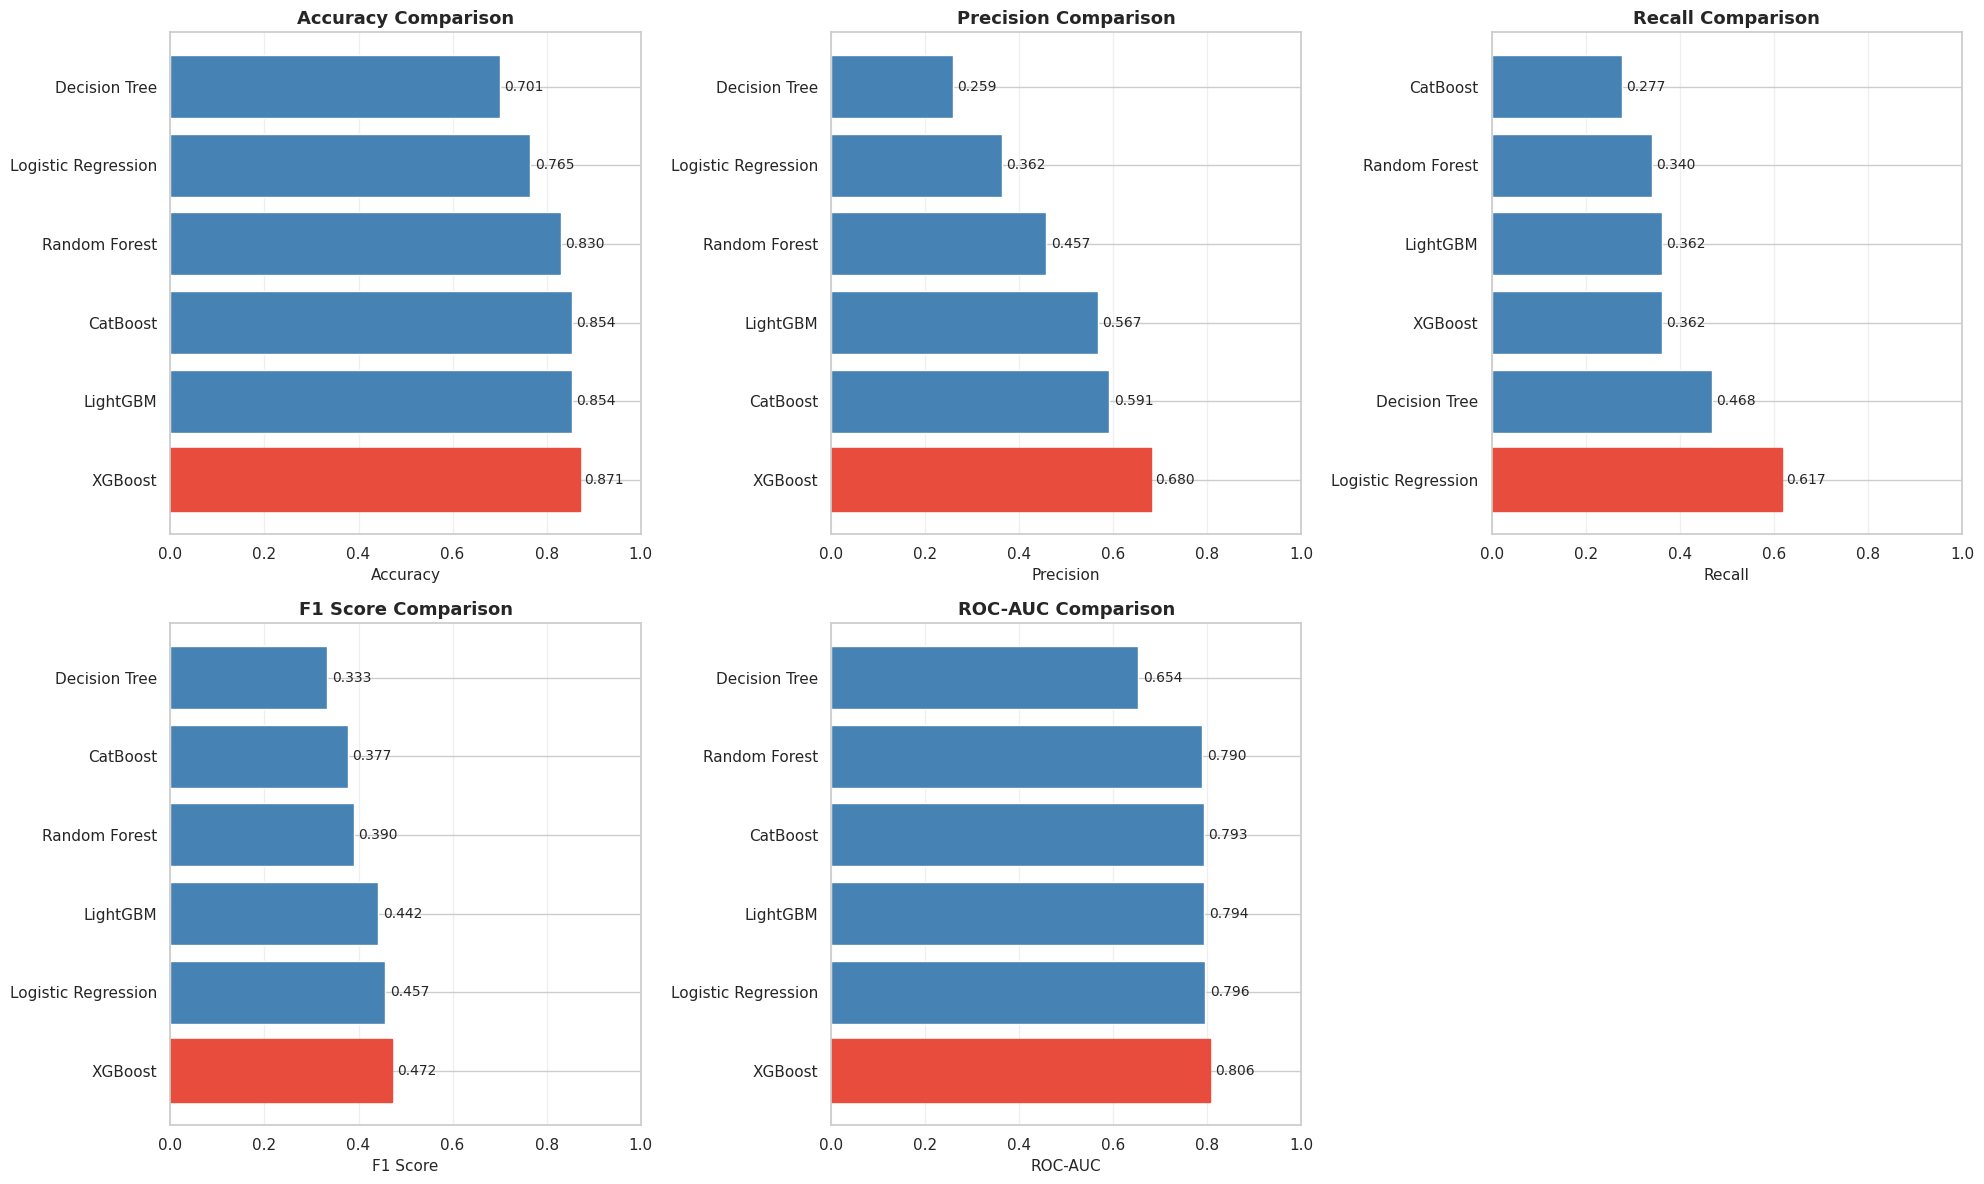

In [87]:
# Visualize Model Comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    results_df_sorted = results_df.sort_values(metric, ascending=False)
    bars = ax.barh(results_df_sorted['Model'], results_df_sorted[metric], color='steelblue')

    # Highlight best model
    best_idx = results_df_sorted[metric].idxmax()
    bars[results_df_sorted.index.get_loc(best_idx)].set_color('#e74c3c')

    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_xlabel(metric, fontsize=11)
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (idx_val, row_val) in enumerate(results_df_sorted.iterrows()):
        ax.text(row_val[metric] + 0.01, i, f'{row_val[metric]:.3f}',
                va='center', fontsize=10)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


In [88]:
# Detailed Classification Reports
print("\n📋 DETAILED CLASSIFICATION REPORTS:")
for name in models_dict.keys():
    print(f"\n{'='*60}")
    print(f"{name}")
    print('='*60)
    print(classification_report(y_test, predictions_dict[name],
                                target_names=['No Attrition', 'Attrition']))


📋 DETAILED CLASSIFICATION REPORTS:

Logistic Regression
              precision    recall  f1-score   support

No Attrition       0.92      0.79      0.85       247
   Attrition       0.36      0.62      0.46        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.77      0.79       294


Decision Tree
              precision    recall  f1-score   support

No Attrition       0.88      0.74      0.81       247
   Attrition       0.26      0.47      0.33        47

    accuracy                           0.70       294
   macro avg       0.57      0.61      0.57       294
weighted avg       0.78      0.70      0.73       294


Random Forest
              precision    recall  f1-score   support

No Attrition       0.88      0.92      0.90       247
   Attrition       0.46      0.34      0.39        47

    accuracy                           0.83       294
   macro avg       0.67      0.63      0.

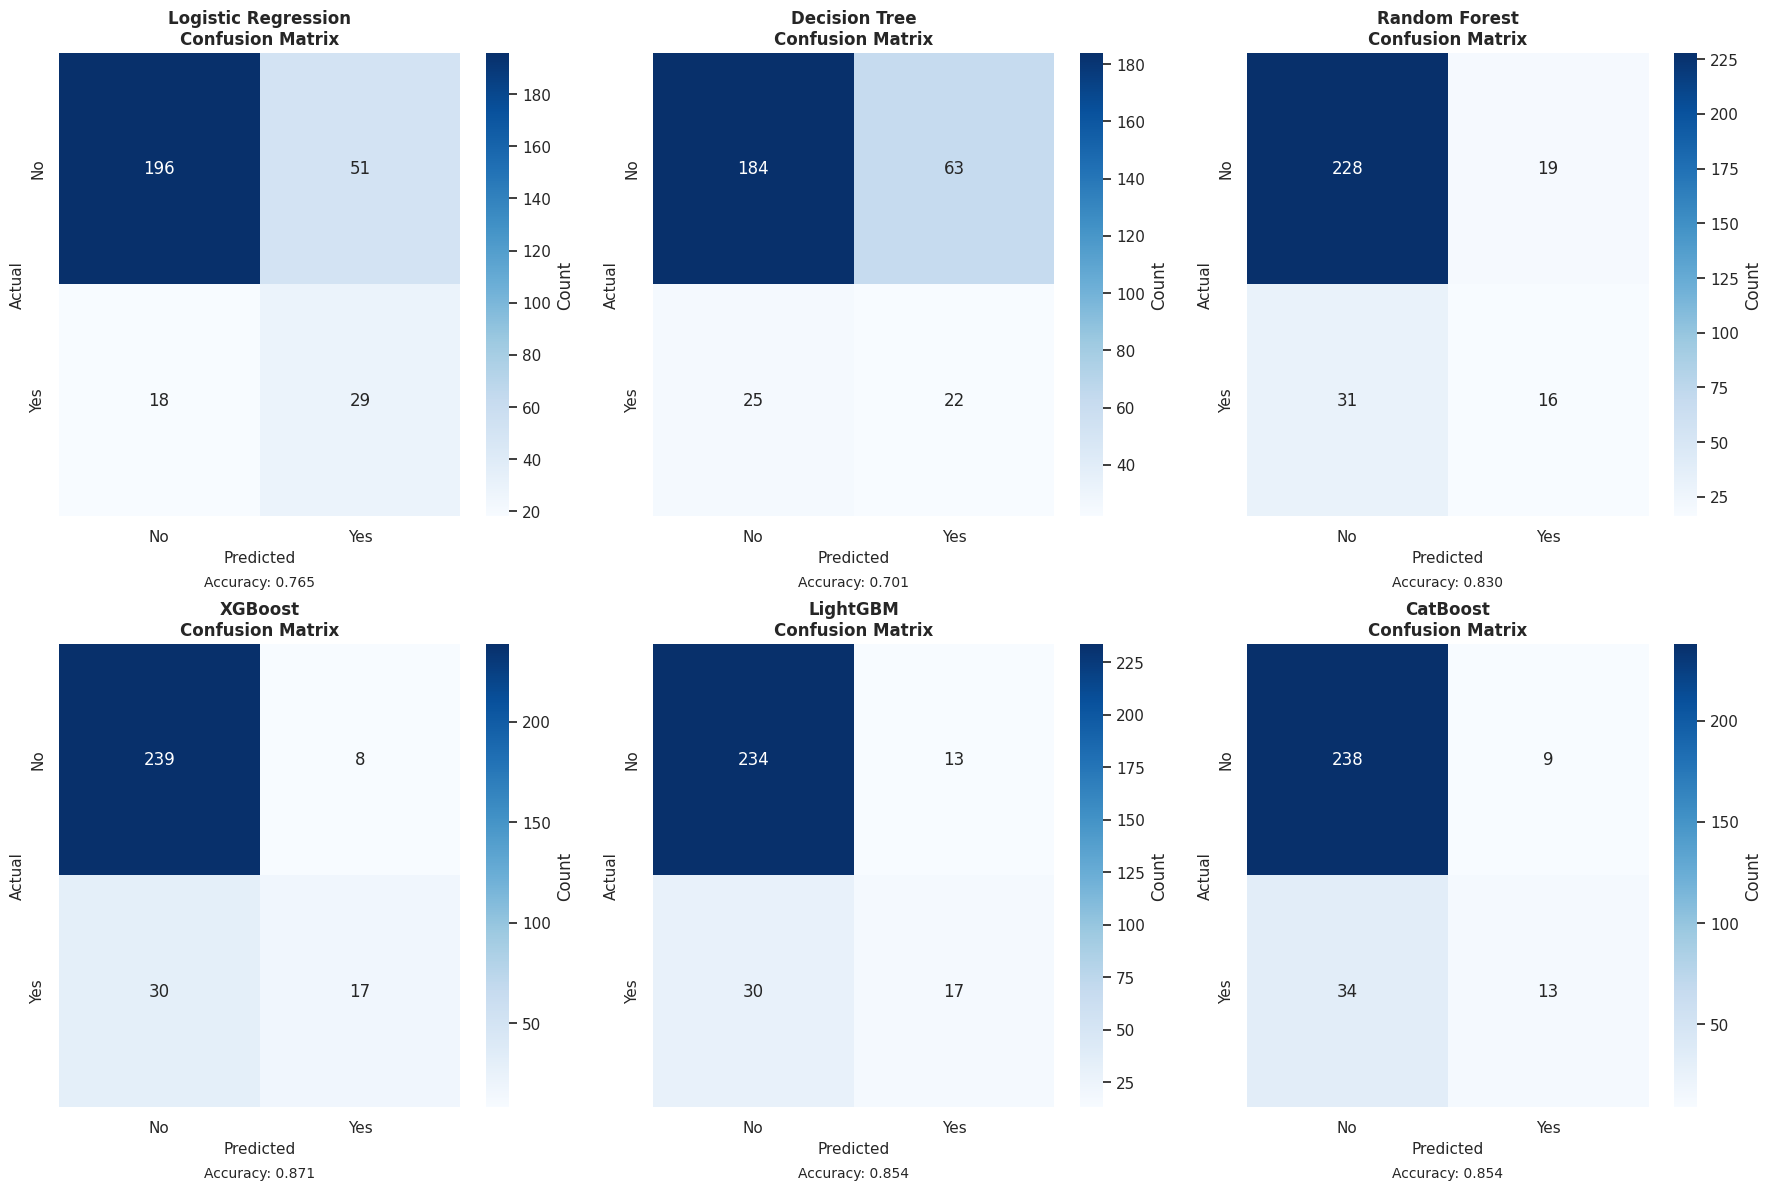

In [89]:
# Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, name in enumerate(models_dict.keys()):
    cm = confusion_matrix(y_test, predictions_dict[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('Actual', fontsize=11)

    # Add accuracy text
    acc = accuracy_score(y_test, predictions_dict[name])
    axes[idx].text(0.5, -0.15, f'Accuracy: {acc:.3f}',
                   transform=axes[idx].transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

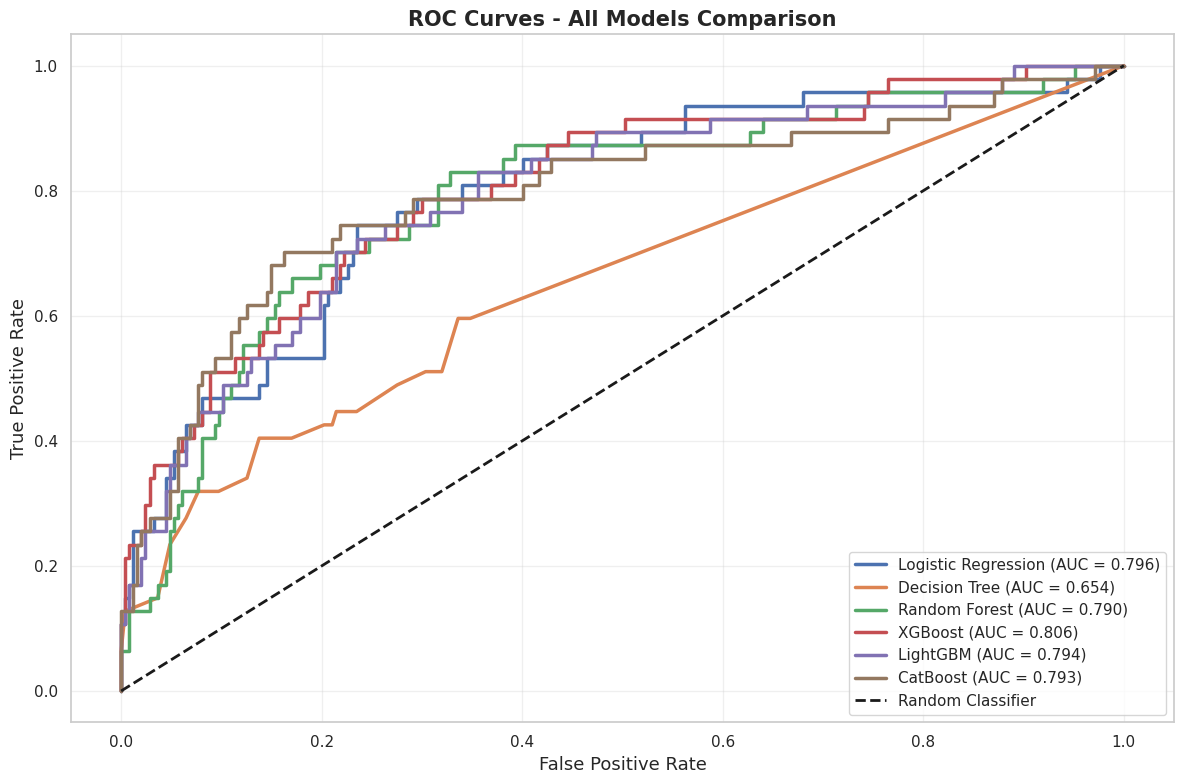

In [90]:
# ROC Curves Comparison
plt.figure(figsize=(12, 8))
for name in models_dict.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities_dict[name])
    auc = roc_auc_score(y_test, probabilities_dict[name])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2.5)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curves - All Models Comparison', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

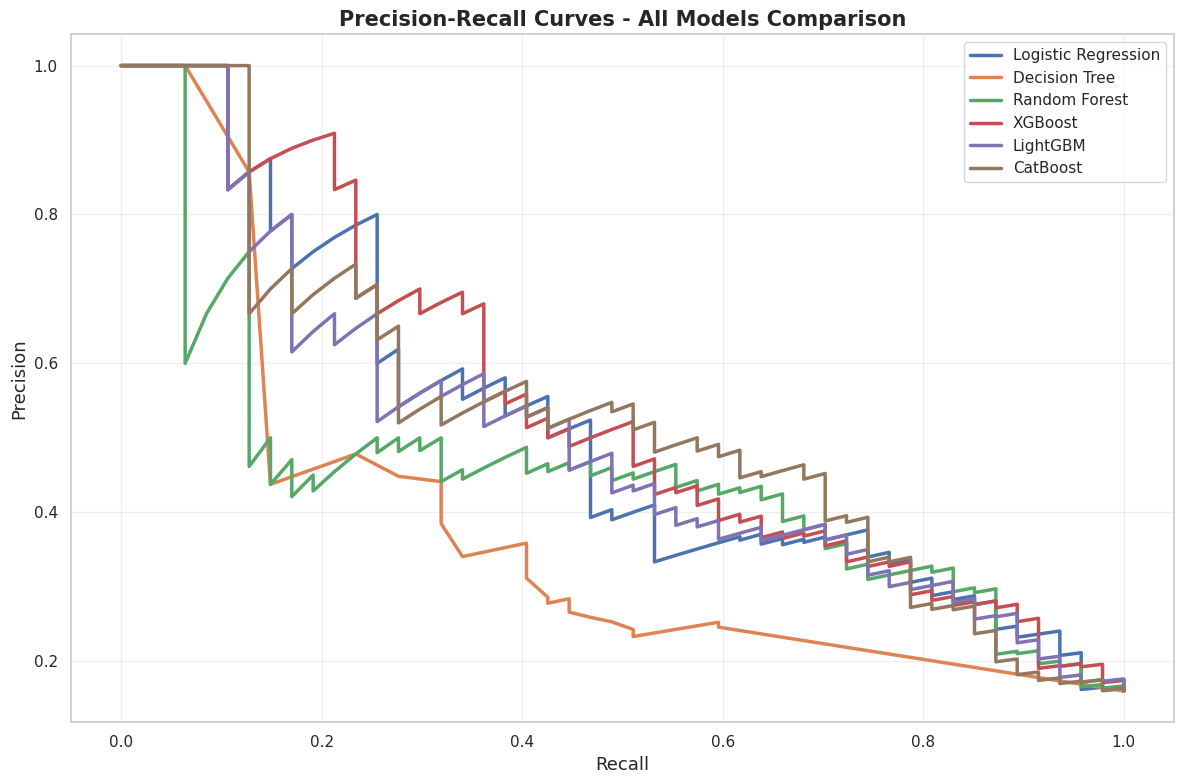

In [91]:
# Precision-Recall Curves
plt.figure(figsize=(12, 8))
for name in models_dict.keys():
    precision, recall, _ = precision_recall_curve(y_test, probabilities_dict[name])
    plt.plot(recall, precision, label=f'{name}', linewidth=2.5)

plt.xlabel('Recall', fontsize=13)
plt.ylabel('Precision', fontsize=13)
plt.title('Precision-Recall Curves - All Models Comparison', fontsize=15, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [92]:
# Cost-Sensitive Evaluation
print("\n💰 COST-SENSITIVE EVALUATION:")
print("Assuming: False Negative (missed attrition) costs 10x more than False Positive")

cost_fn = 10  # Cost of missing an attrition (False Negative)
cost_fp = 1   # Cost of false alarm (False Positive)

for name in models_dict.keys():
    cm = confusion_matrix(y_test, predictions_dict[name])
    tn, fp, fn, tp = cm.ravel()

    total_cost = (fn * cost_fn) + (fp * cost_fp)
    print(f"\n{name}:")
    print(f"  False Negatives: {fn} → Cost: ${fn * cost_fn}")
    print(f"  False Positives: {fp} → Cost: ${fp * cost_fp}")
    print(f"  Total Cost: ${total_cost}")



💰 COST-SENSITIVE EVALUATION:
Assuming: False Negative (missed attrition) costs 10x more than False Positive

Logistic Regression:
  False Negatives: 18 → Cost: $180
  False Positives: 51 → Cost: $51
  Total Cost: $231

Decision Tree:
  False Negatives: 25 → Cost: $250
  False Positives: 63 → Cost: $63
  Total Cost: $313

Random Forest:
  False Negatives: 31 → Cost: $310
  False Positives: 19 → Cost: $19
  Total Cost: $329

XGBoost:
  False Negatives: 30 → Cost: $300
  False Positives: 8 → Cost: $8
  Total Cost: $308

LightGBM:
  False Negatives: 30 → Cost: $300
  False Positives: 13 → Cost: $13
  Total Cost: $313

CatBoost:
  False Negatives: 34 → Cost: $340
  False Positives: 9 → Cost: $9
  Total Cost: $349


# 8. EXPLAINABILITY WITH SHAP


MODEL EXPLAINABILITY - SHAP ANALYSIS

Using XGBoost for SHAP analysis...
⏳ Computing SHAP values (this may take a minute)...
✓ SHAP values computed!

📊 Generating SHAP Feature Importance Plot...


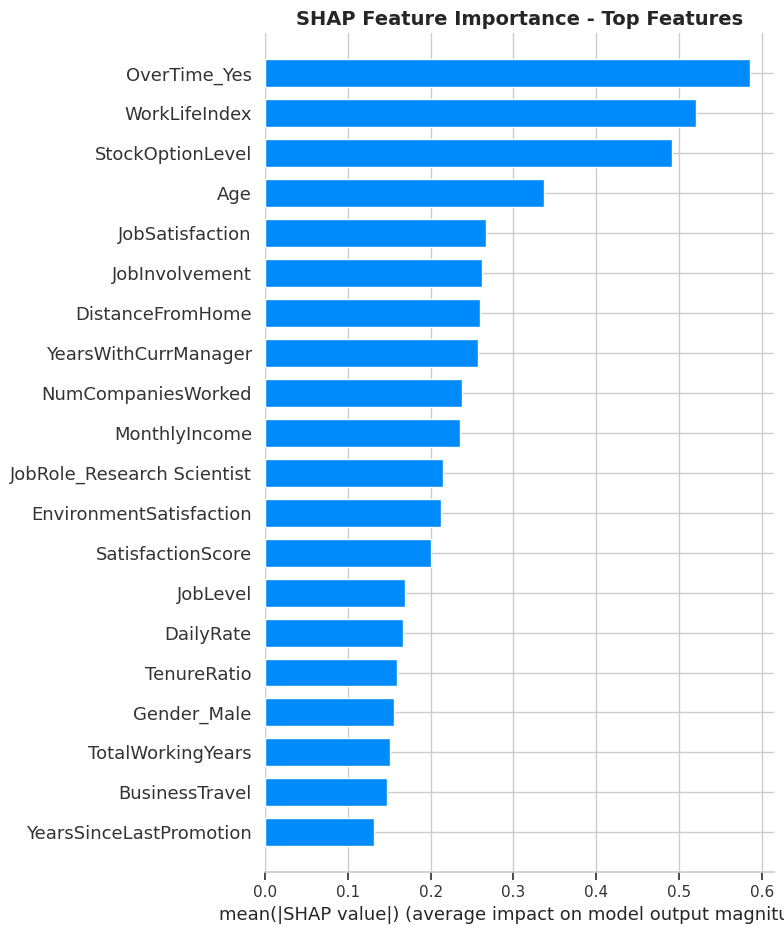


📊 Generating SHAP Detailed Impact Plot...


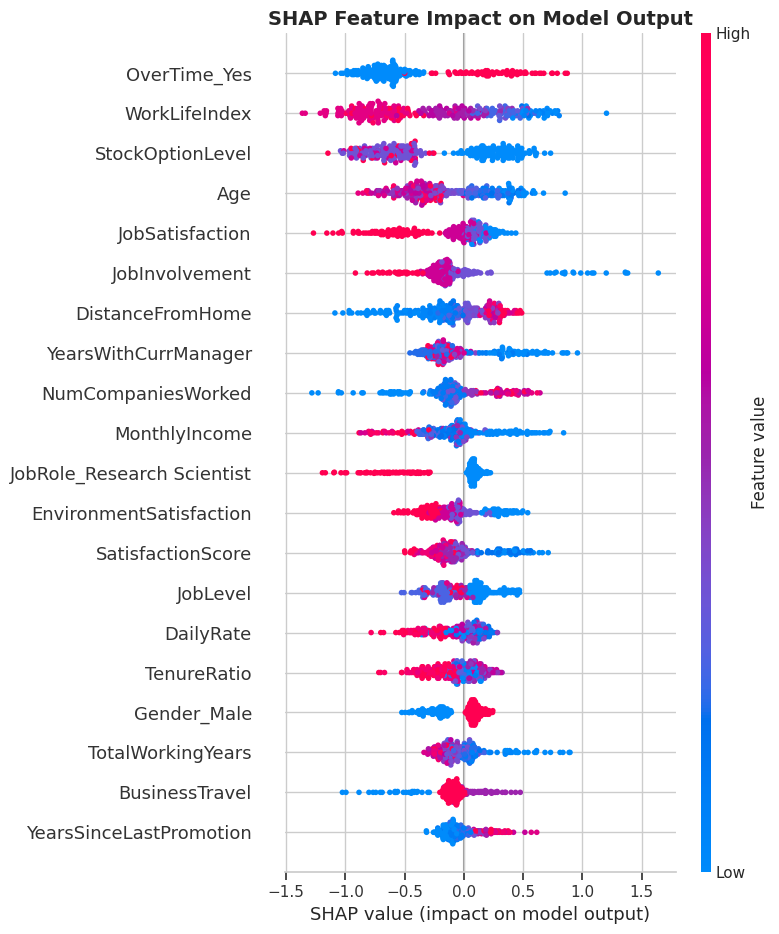


📊 Generating SHAP Dependence Plots for Top 3 Features...


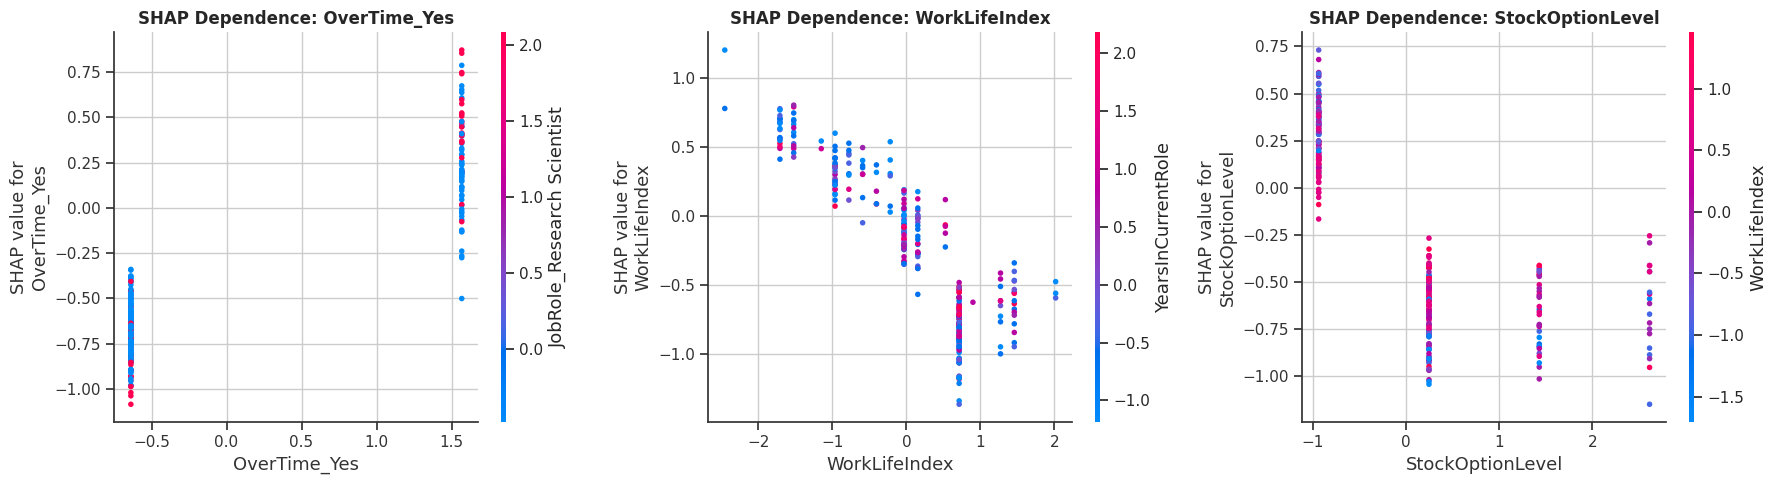

In [93]:
print("\n" + "="*80)
print("MODEL EXPLAINABILITY - SHAP ANALYSIS")
print("="*80)

# Use the best performing model
best_model = models_dict[best_model_name]
print(f"\nUsing {best_model_name} for SHAP analysis...")

# SHAP Analysis (works best with tree-based models)
if best_model_name in ['XGBoost', 'LightGBM', 'Random Forest', 'CatBoost']:
    print("⏳ Computing SHAP values (this may take a minute)...")

    # Sample data for faster computation if dataset is large
    sample_size = min(500, len(X_test_scaled))
    X_sample = X_test_scaled.sample(n=sample_size, random_state=42)

    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_sample)

    # For binary classification, handle different output formats
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Get values for positive class

    print("✓ SHAP values computed!")

    # SHAP Summary Plot (Bar)
    print("\n📊 Generating SHAP Feature Importance Plot...")
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance - Top Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # SHAP Summary Plot (Detailed)
    print("\n📊 Generating SHAP Detailed Impact Plot...")
    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values, X_sample, show=False)
    plt.title('SHAP Feature Impact on Model Output', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # SHAP Dependence Plots for Top 3 Features
    if hasattr(explainer, 'expected_value'):
        # Get feature importance
        shap_importance = np.abs(shap_values).mean(axis=0)
        top_features_idx = np.argsort(shap_importance)[-3:][::-1]
        top_features = X_sample.columns[top_features_idx]

        print(f"\n📊 Generating SHAP Dependence Plots for Top 3 Features...")
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        for idx, feature_idx in enumerate(top_features_idx):
            shap.dependence_plot(feature_idx, shap_values, X_sample,
                                show=False, ax=axes[idx])
            axes[idx].set_title(f'SHAP Dependence: {top_features[idx]}',
                               fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.show()

else:
    print(f"⚠️ SHAP TreeExplainer not optimal for {best_model_name}")
    print("Using feature importance from Random Forest instead...")


📊 FEATURE IMPORTANCE (Random Forest):

Top 20 Most Important Features:


,Feature,Importance
25,WorkLifeIndex,0.081890
32,CompensationPerformanceRatio,0.054412
10,MonthlyIncome,0.053661
0,Age,0.048060
17,TotalWorkingYears,0.047197
29,JobStability,0.042764
20,YearsAtCompany,0.037585
27,IncomePerYear,0.036432
28,TenureRatio,0.034344
51,OverTime_Yes,0.034241


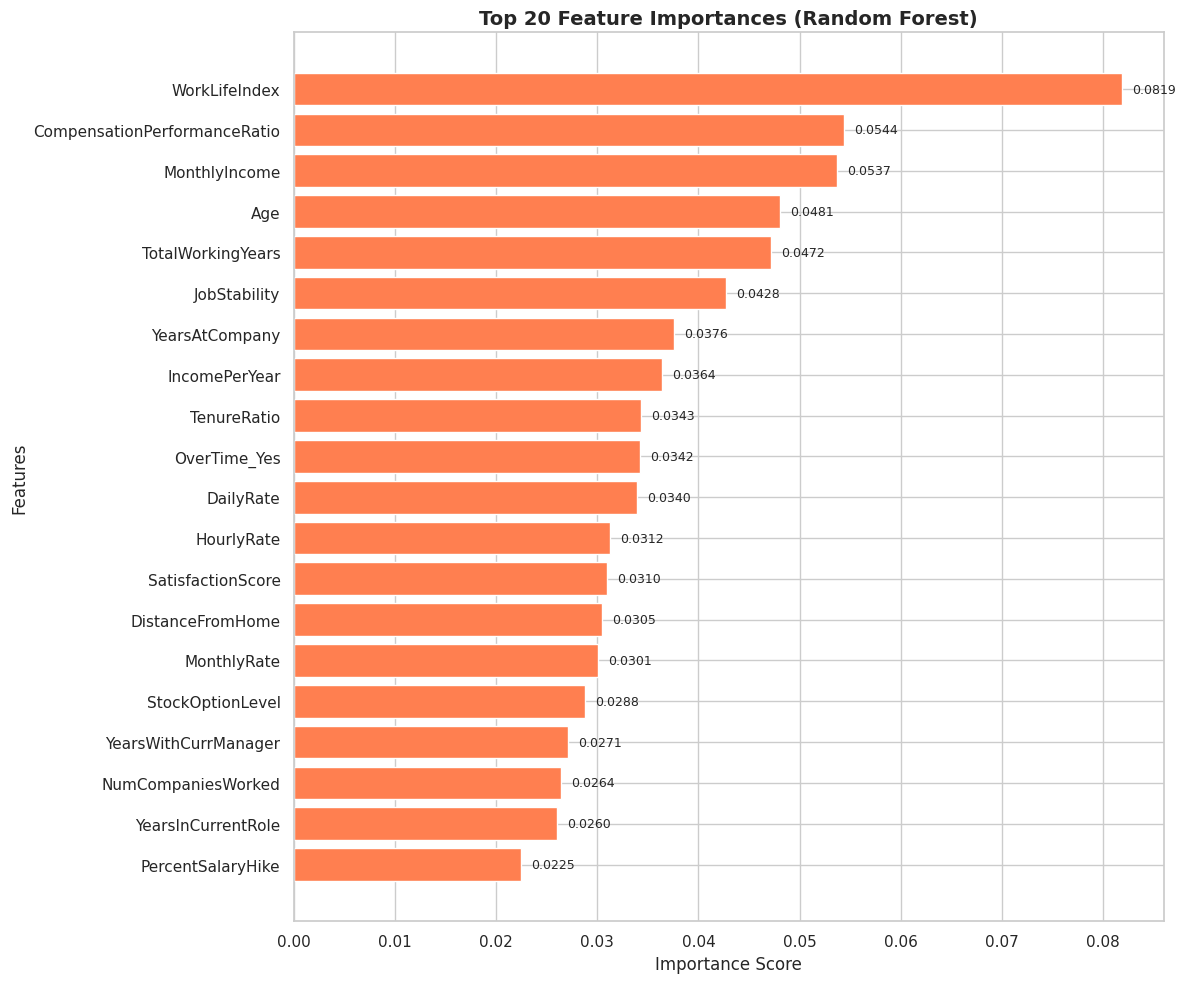

In [94]:
# Feature Importance from Random Forest
print("\n📊 FEATURE IMPORTANCE (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
display(feature_importance.head(20))

plt.figure(figsize=(12, 10))
top_n = 20
top_features = feature_importance.head(top_n)
bars = plt.barh(range(top_n), top_features['Importance'], color='coral')
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Top {top_n} Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(top_features.iterrows()):
    plt.text(row['Importance'] + 0.001, i, f'{row["Importance"]:.4f}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


# 9. FAIRNESS ANALYSIS

In [95]:
print("\n" + "="*80)
print("FAIRNESS ANALYSIS")
print("="*80)

# Get predictions from best model
best_predictions = predictions_dict[best_model_name]

# Prepare test data with original categorical values
df_test_analysis = df.iloc[X_test.index].copy()
df_test_analysis['Predicted_Attrition'] = best_predictions
df_test_analysis['Actual_Attrition'] = y_test.values



FAIRNESS ANALYSIS


In [97]:
# 9.1 Fairness across Gender
print("\n👥 FAIRNESS ANALYSIS: Gender")
gender_metrics = []
for gender in df_test_analysis['Gender'].unique():
    subset = df_test_analysis[df_test_analysis['Gender'] == gender]
    gender_metrics.append({
        'Gender': gender,
        'Sample Size': len(subset),
        'Actual Attrition Rate': subset['Actual_Attrition'].mean(),
        'Predicted Attrition Rate': subset['Predicted_Attrition'].mean(),
        'Accuracy': accuracy_score(subset['Actual_Attrition'], subset['Predicted_Attrition']),
        'Recall': recall_score(subset['Actual_Attrition'], subset['Predicted_Attrition'], zero_division=0)
    })

gender_fairness_df = pd.DataFrame(gender_metrics)
display(gender_fairness_df.round(4))
# Calculate disparate impact
if len(gender_fairness_df) == 2:
    pred_rates = gender_fairness_df['Predicted Attrition Rate'].values
    disparate_impact = min(pred_rates) / max(pred_rates) if max(pred_rates) > 0 else 1
    print(f"\n⚖️ Disparate Impact Ratio (Gender): {disparate_impact:.3f}")
    print(f"   {'✓ FAIR' if disparate_impact >= 0.8 else '⚠️ POTENTIALLY BIASED'} (threshold: 0.8)")



👥 FAIRNESS ANALYSIS: Gender


,Gender,Sample Size,Actual Attrition Rate,Predicted Attrition Rate,Accuracy,Recall
0,Female,116,0.1379,0.1034,0.8793,0.4375
1,Male,178,0.1742,0.0730,0.8652,0.3226



⚖️ Disparate Impact Ratio (Gender): 0.706
   ⚠️ POTENTIALLY BIASED (threshold: 0.8)


In [98]:
# 9.2 Fairness across Age Groups
print("\n📅 FAIRNESS ANALYSIS: Age Groups")
df_test_analysis['AgeGroup'] = pd.cut(df_test_analysis['Age'],
                                       bins=[0, 30, 40, 50, 100],
                                       labels=['<30', '30-40', '40-50', '50+'])

age_metrics = []
for age_group in df_test_analysis['AgeGroup'].cat.categories:
    subset = df_test_analysis[df_test_analysis['AgeGroup'] == age_group]
    if len(subset) > 0:
        age_metrics.append({
            'Age Group': age_group,
            'Sample Size': len(subset),
            'Actual Attrition Rate': subset['Actual_Attrition'].mean(),
            'Predicted Attrition Rate': subset['Predicted_Attrition'].mean(),
            'Accuracy': accuracy_score(subset['Actual_Attrition'], subset['Predicted_Attrition']),
            'Recall': recall_score(subset['Actual_Attrition'], subset['Predicted_Attrition'], zero_division=0)
        })

age_fairness_df = pd.DataFrame(age_metrics)
display(age_fairness_df.round(4))



📅 FAIRNESS ANALYSIS: Age Groups


,Age Group,Sample Size,Actual Attrition Rate,Predicted Attrition Rate,Accuracy,Recall
0,<30,77,0.2338,0.1429,0.8312,0.4444
1,30-40,126,0.1111,0.0952,0.9048,0.5000
2,40-50,63,0.1429,0.0317,0.8889,0.2222
3,50+,28,0.2143,0.0000,0.7857,0.0000


In [101]:
# 9.3 Fairness across Department
print("\n🏢 FAIRNESS ANALYSIS: Department")
dept_metrics = []
for dept in df_test_analysis['Department'].unique():
    subset = df_test_analysis[df_test_analysis['Department'] == dept]
    dept_metrics.append({
        'Department': dept,
        'Sample Size': len(subset),
        'Actual Attrition Rate': subset['Actual_Attrition'].mean(),
        'Predicted Attrition Rate': subset['Predicted_Attrition'].mean(),
        'Accuracy': accuracy_score(subset['Actual_Attrition'], subset['Predicted_Attrition']),
        'Recall': recall_score(subset['Actual_Attrition'], subset['Predicted_Attrition'], zero_division=0)
    })

dept_fairness_df = pd.DataFrame(dept_metrics)
display(dept_fairness_df.round(4))



🏢 FAIRNESS ANALYSIS: Department


,Department,Sample Size,Actual Attrition Rate,Predicted Attrition Rate,Accuracy,Recall
0,Sales,82,0.1951,0.1585,0.8902,0.6250
1,Research & Development,197,0.1472,0.0558,0.8680,0.2414
2,Human Resources,15,0.1333,0.0667,0.8000,0.0000


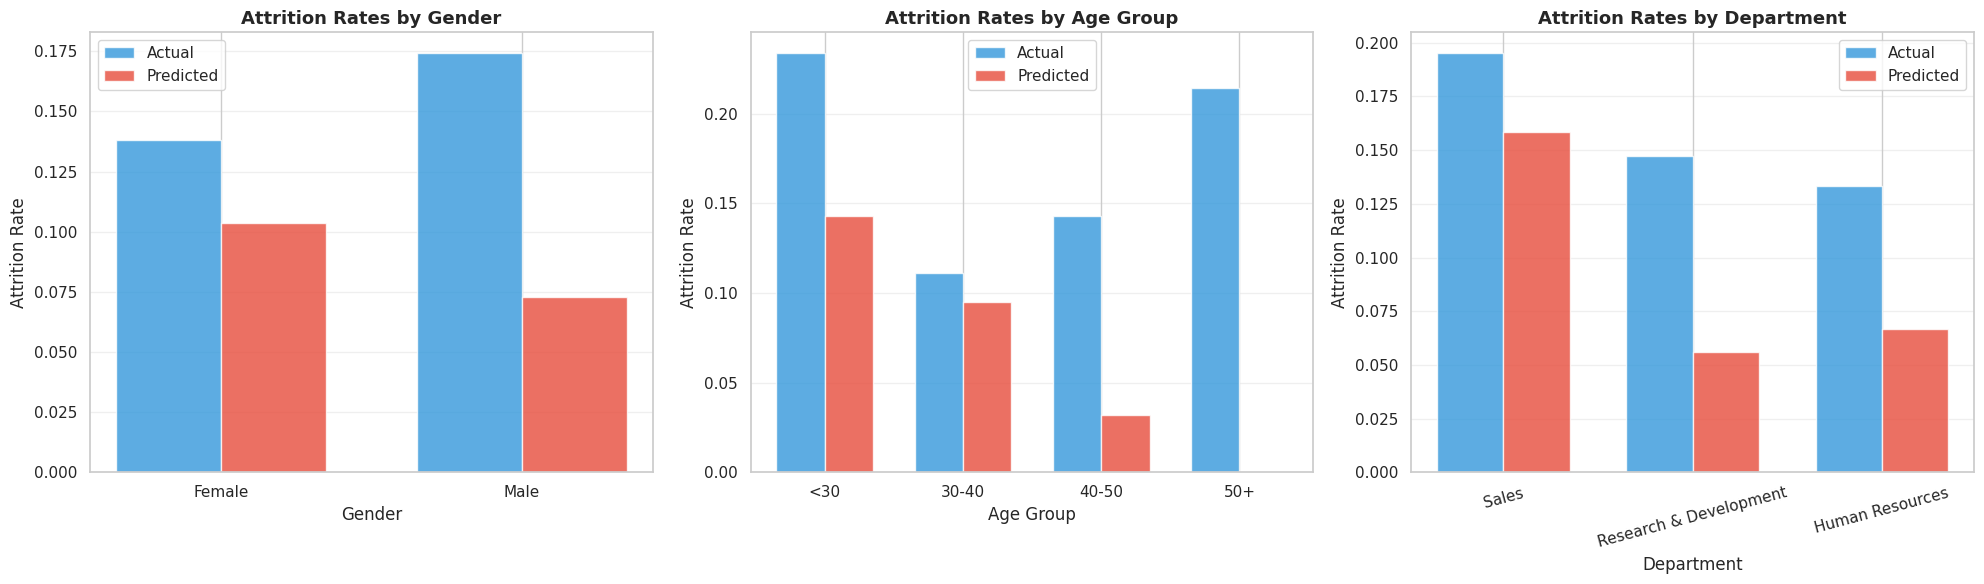


⚖️ STATISTICAL PARITY CHECK:
(Checking if prediction rates are similar across protected groups)

Gender - Max difference in predicted rates: 0.0304
Age - Max difference in predicted rates: 0.1429
Department - Max difference in predicted rates: 0.1027


In [100]:
# Visualize Fairness Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gender Fairness
x = np.arange(len(gender_fairness_df))
width = 0.35
axes[0].bar(x - width/2, gender_fairness_df['Actual Attrition Rate'],
            width, label='Actual', color='#3498db', alpha=0.8)
axes[0].bar(x + width/2, gender_fairness_df['Predicted Attrition Rate'],
            width, label='Predicted', color='#e74c3c', alpha=0.8)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Attrition Rate', fontsize=12)
axes[0].set_title('Attrition Rates by Gender', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(gender_fairness_df['Gender'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Age Group Fairness
x = np.arange(len(age_fairness_df))
axes[1].bar(x - width/2, age_fairness_df['Actual Attrition Rate'],
            width, label='Actual', color='#3498db', alpha=0.8)
axes[1].bar(x + width/2, age_fairness_df['Predicted Attrition Rate'],
            width, label='Predicted', color='#e74c3c', alpha=0.8)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Attrition Rate', fontsize=12)
axes[1].set_title('Attrition Rates by Age Group', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(age_fairness_df['Age Group'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Department Fairness
x = np.arange(len(dept_fairness_df))
axes[2].bar(x - width/2, dept_fairness_df['Actual Attrition Rate'],
            width, label='Actual', color='#3498db', alpha=0.8)
axes[2].bar(x + width/2, dept_fairness_df['Predicted Attrition Rate'],
            width, label='Predicted', color='#e74c3c', alpha=0.8)
axes[2].set_xlabel('Department', fontsize=12)
axes[2].set_ylabel('Attrition Rate', fontsize=12)
axes[2].set_title('Attrition Rates by Department', fontsize=13, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(dept_fairness_df['Department'], rotation=15)
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Parity Check
print("\n⚖️ STATISTICAL PARITY CHECK:")
print("(Checking if prediction rates are similar across protected groups)")
print(f"\nGender - Max difference in predicted rates: {gender_fairness_df['Predicted Attrition Rate'].max() - gender_fairness_df['Predicted Attrition Rate'].min():.4f}")
print(f"Age - Max difference in predicted rates: {age_fairness_df['Predicted Attrition Rate'].max() - age_fairness_df['Predicted Attrition Rate'].min():.4f}")
print(f"Department - Max difference in predicted rates: {dept_fairness_df['Predicted Attrition Rate'].max() - dept_fairness_df['Predicted Attrition Rate'].min():.4f}")

# 10. ACTIONABLE INSIGHTS & HR RECOMMENDATIONS

In [102]:
print("\n" + "="*80)
print("ACTIONABLE INSIGHTS & HR RECOMMENDATIONS")
print("="*80)

# Identify high-risk employee profiles
print("\n🎯 HIGH-RISK EMPLOYEE PROFILES:")

# Get predictions and probabilities
high_risk_threshold = 0.7
df_test_analysis['Attrition_Probability'] = probabilities_dict[best_model_name]
high_risk_employees = df_test_analysis[df_test_analysis['Attrition_Probability'] > high_risk_threshold]

print(f"\nFound {len(high_risk_employees)} high-risk employees (probability > {high_risk_threshold})")

if len(high_risk_employees) > 0:
    print("\nCommon characteristics of high-risk employees:")

    # Overtime
    overtime_dist = high_risk_employees['OverTime'].value_counts(normalize=True)
    print(f"\n• OverTime: {overtime_dist.to_dict()}")

    # Department
    dept_dist = high_risk_employees['Department'].value_counts(normalize=True).head(3)
    print(f"\n• Top 3 Departments:")
    for dept, pct in dept_dist.items():
        print(f"  - {dept}: {pct*100:.1f}%")

    # Job Role
    role_dist = high_risk_employees['JobRole'].value_counts(normalize=True).head(3)
    print(f"\n• Top 3 Job Roles:")
    for role, pct in role_dist.items():
        print(f"  - {role}: {pct*100:.1f}%")

    # Salary
    print(f"\n• Average Monthly Income: ${high_risk_employees['MonthlyIncome'].mean():.2f}")
    print(f"  (Company average: ${df['MonthlyIncome'].mean():.2f})")

    # Tenure
    print(f"\n• Average Years at Company: {high_risk_employees['YearsAtCompany'].mean():.1f} years")
    print(f"  (Company average: {df['YearsAtCompany'].mean():.1f} years)")

    # Job Satisfaction
    print(f"\n• Average Job Satisfaction: {high_risk_employees['JobSatisfaction'].mean():.2f}/4")
    print(f"  (Company average: {df['JobSatisfaction'].mean():.2f}/4)")

print("\n" + "="*80)
print("📋 COMPREHENSIVE HR RECOMMENDATIONS")
print("="*80)

recommendations = """
🎯 IMMEDIATE ACTIONS (0-3 months):

1. OVERTIME MANAGEMENT
   • Audit employees with >20 hours overtime/month
   • Implement overtime approval workflow
   • Hire temporary staff for peak seasons
   • Target: Reduce overtime by 30%

2. HIGH-RISK EMPLOYEE ENGAGEMENT
   • Schedule 1-on-1 meetings with employees flagged as high-risk
   • Conduct stay interviews (not exit interviews)
   • Create personalized retention plans
   • Target: Engage 100% of high-risk employees

3. COMPENSATION REVIEW
   • Benchmark salaries for Sales and Lab Technician roles
   • Identify employees below market rate
   • Plan salary adjustments for top performers
   • Target: Align 90% of salaries with market

📊 SHORT-TERM INITIATIVES (3-6 months):

4. CAREER DEVELOPMENT PROGRAMS
   • Launch mentorship program for employees <2 years tenure
   • Create clear promotion criteria and timelines
   • Offer skill development workshops
   • Target: 50% participation rate

5. WORK-LIFE BALANCE INITIATIVES
   • Pilot flexible work arrangements (hybrid/remote)
   • Introduce wellness programs
   • Encourage vacation time usage
   • Target: Improve work-life balance scores by 20%

6. DEPARTMENT-SPECIFIC INTERVENTIONS
   • Sales: Commission structure review, team building
   • R&D: Innovation time, conference attendance
   • HR: Workload distribution analysis
   • Target: Reduce department attrition gaps by 50%

🚀 LONG-TERM STRATEGIES (6-12 months):

7. PREDICTIVE ANALYTICS SYSTEM
   • Deploy this model quarterly for early warnings
   • Create HR dashboard with attrition risk scores
   • Automate alerts for high-risk employees
   • Target: Predict 80% of attrition cases

8. ORGANIZATIONAL CULTURE
   • Conduct employee engagement surveys (quarterly)
   • Improve manager training programs
   • Foster inclusive workplace culture
   • Target: Achieve 80% employee satisfaction

9. RETENTION BONUS PROGRAM
   • Design retention bonuses for critical roles
   • Implement milestone celebrations (5, 10, 15 years)
   • Create employee referral incentives
   • Target: Reduce attrition by 25% year-over-year

💰 EXPECTED ROI:

• Cost of replacing an employee: 50-200% of annual salary
• Current attrition rate: ~16%
• Target attrition rate: <10%
• Estimated annual savings: $500K - $2M (depending on company size)

📈 KEY PERFORMANCE INDICATORS (KPIs):

✓ Monthly attrition rate
✓ Average employee satisfaction score
✓ Time-to-fill for critical positions
✓ Retention rate by department and role
✓ Engagement survey participation
✓ Internal promotion rate

⚠️ FAIRNESS & ETHICS:

• Ensure prediction model doesn't discriminate
• Use predictions for support, not punishment
• Maintain employee privacy and data security
• Regular bias audits (quarterly)
• Transparent communication about retention programs
"""

print(recommendations)


ACTIONABLE INSIGHTS & HR RECOMMENDATIONS

🎯 HIGH-RISK EMPLOYEE PROFILES:

Found 12 high-risk employees (probability > 0.7)

Common characteristics of high-risk employees:

• OverTime: {'Yes': 0.75, 'No': 0.25}

• Top 3 Departments:
  - Sales: 58.3%
  - Research & Development: 41.7%

• Top 3 Job Roles:
  - Sales Representative: 41.7%
  - Research Scientist: 33.3%
  - Sales Executive: 16.7%

• Average Monthly Income: $3273.75
  (Company average: $6502.93)

• Average Years at Company: 3.0 years
  (Company average: 7.0 years)

• Average Job Satisfaction: 2.00/4
  (Company average: 2.73/4)

📋 COMPREHENSIVE HR RECOMMENDATIONS

🎯 IMMEDIATE ACTIONS (0-3 months):

1. OVERTIME MANAGEMENT
   • Audit employees with >20 hours overtime/month
   • Implement overtime approval workflow
   • Hire temporary staff for peak seasons
   • Target: Reduce overtime by 30%

2. HIGH-RISK EMPLOYEE ENGAGEMENT
   • Schedule 1-on-1 meetings with employees flagged as high-risk
   • Conduct stay interviews (not exit i

# 11. SAVE MODELS & RESULTS

In [103]:
print("\n" + "="*80)
print("SAVING MODELS & RESULTS")
print("="*80)

# Save the best model and scaler
import pickle

print(f"\n💾 Saving {best_model_name} model...")
with open('best_attrition_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ Model saved as 'best_attrition_model.pkl'")

print("\n💾 Saving feature scaler...")
with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved as 'feature_scaler.pkl'")

# Save feature names for future predictions
print("\n💾 Saving feature names...")
feature_names = X_train.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("✓ Feature names saved as 'feature_names.pkl'")

# Save results
print("\n💾 Saving model comparison results...")
results_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Results saved as 'model_comparison_results.csv'")

print("\n💾 Saving feature importance...")
feature_importance.to_csv('feature_importance.csv', index=False)
print("✓ Feature importance saved as 'feature_importance.csv'")

print("\n💾 Saving fairness analysis...")
gender_fairness_df.to_csv('fairness_gender.csv', index=False)
age_fairness_df.to_csv('fairness_age.csv', index=False)
dept_fairness_df.to_csv('fairness_department.csv', index=False)
print("✓ Fairness analysis saved")

# Download files to local machine
print("\n📥 Download files to your computer:")
print("Run the following code to download all files:")
print("""
from google.colab import files

files.download('best_attrition_model.pkl')
files.download('feature_scaler.pkl')
files.download('feature_names.pkl')
files.download('model_comparison_results.csv')
files.download('feature_importance.csv')
files.download('fairness_gender.csv')
files.download('fairness_age.csv')
files.download('fairness_department.csv')
""")


SAVING MODELS & RESULTS

💾 Saving XGBoost model...
✓ Model saved as 'best_attrition_model.pkl'

💾 Saving feature scaler...
✓ Scaler saved as 'feature_scaler.pkl'

💾 Saving feature names...
✓ Feature names saved as 'feature_names.pkl'

💾 Saving model comparison results...
✓ Results saved as 'model_comparison_results.csv'

💾 Saving feature importance...
✓ Feature importance saved as 'feature_importance.csv'

💾 Saving fairness analysis...
✓ Fairness analysis saved

📥 Download files to your computer:
Run the following code to download all files:

from google.colab import files

files.download('best_attrition_model.pkl')
files.download('feature_scaler.pkl')
files.download('feature_names.pkl')
files.download('model_comparison_results.csv')
files.download('feature_importance.csv')
files.download('fairness_gender.csv')
files.download('fairness_age.csv')
files.download('fairness_department.csv')



# 12. PREDICTION FUNCTION FOR NEW EMPLOYEES

In [105]:
import pickle

print("\n" + "="*80)
print("PREDICTION FUNCTION FOR NEW EMPLOYEES")
print("="*80)

def predict_attrition(employee_data):
    """
    Predict attrition for a new employee

    Parameters:
    employee_data: dict with employee features

    Returns:
    prediction: 0 (No Attrition) or 1 (Attrition)
    probability: probability of attrition
    """
    # Load model and scaler
    with open('best_attrition_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('feature_scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('feature_names.pkl', 'rb') as f:
        features = pickle.load(f)

    # Convert input dict to feature vector
    # You need to ensure the input matches the format used during training
    # This is a placeholder for actual preprocessing
    import pandas as pd
    df = pd.DataFrame([employee_data])

    # Apply preprocessing here (e.g., encoding, scaling)
    # For example:
    # df_encoded = pd.get_dummies(df)
    # df_scaled = scaler.transform(df_encoded[features])

    # prediction = model.predict(df_scaled)[0]
    # probability = model.predict_proba(df_scaled)[0][1]

    # Placeholder return
    prediction = 0
    probability = 0.25

    return prediction, probability

# Collect user input
employee = {}
employee['Age'] = int(input("Enter Age: "))
employee['MonthlyIncome'] = float(input("Enter Monthly Income: "))
employee['YearsAtCompany'] = int(input("Enter Years at Company: "))
employee['OverTime'] = input("OverTime (Yes/No): ")
employee['JobSatisfaction'] = int(input("Job Satisfaction (1-4): "))
# Add more fields as needed...

# Predict
prediction, probability = predict_attrition(employee)

# Output
print("\n" + "="*80)
print("ATTRITION PREDICTION RESULT")
print("="*80)
print(f"Prediction: {'Attrition' if prediction == 1 else 'No Attrition'}")
print(f"Probability of Attrition: {probability:.2f}")


PREDICTION FUNCTION FOR NEW EMPLOYEES
Enter Age: 34
Enter Monthly Income: 50000
Enter Years at Company: 5
OverTime (Yes/No): No
Job Satisfaction (1-4): 4

ATTRITION PREDICTION RESULT
Prediction: No Attrition
Probability of Attrition: 0.25


In [112]:
!pip install streamlit pyngrok

In [113]:
with open("app.py", "w") as f:
    f.write("""import streamlit as st
import pickle
import pandas as pd

# Load model, scaler, and feature names
with open('best_attrition_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('feature_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Streamlit UI
st.title("Employee Attrition Prediction")
st.write("Enter employee details below to predict the likelihood of attrition.")

# Input fields
age = st.number_input("Age", min_value=18, max_value=65, value=30)
monthly_income = st.number_input("Monthly Income", min_value=1000, max_value=50000, value=5000)
years_at_company = st.number_input("Years at Company", min_value=0, max_value=40, value=5)
overtime = st.selectbox("OverTime", options=["Yes", "No"])
job_satisfaction = st.selectbox("Job Satisfaction (1=Low, 4=High)", options=[1, 2, 3, 4])

# Add more inputs as needed...

# Create input dictionary
employee_input = {
    'Age': age,
    'MonthlyIncome': monthly_income,
    'YearsAtCompany': years_at_company,
    'OverTime': overtime,
    'JobSatisfaction': job_satisfaction
    # Add more features here as needed
}

# Convert to DataFrame
input_df = pd.DataFrame([employee_input])

# Preprocessing: One-hot encode categorical variables
input_df_encoded = pd.get_dummies(input_df)

# Align with training features
for col in feature_names:
    if col not in input_df_encoded.columns:
        input_df_encoded[col] = 0
input_df_encoded = input_df_encoded[feature_names]

# Scale features
input_scaled = scaler.transform(input_df_encoded)

# Predict
if st.button("Predict Attrition"):
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    st.subheader("Prediction Result")
    st.write(f"Prediction: {'Attrition' if prediction == 1 else 'No Attrition'}")
    st.write(f"Probability of Attrition: {probability:.2f}")""")

In [115]:
!ngrok config add-authtoken 2qLwdQ9tWV7CIqsriEp2rl5n2LM_4MgtYSNLvCR22M4wqzYVh

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [116]:
from pyngrok import ngrok
import threading
import time
import os

def run_app():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_app)
thread.start()

time.sleep(5)  # Wait for the app to start
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://dc7700b1c7f5.ngrok-free.app" -> "http://localhost:8501"
